In [2]:
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import logomaker
import seaborn as sns
from matplotlib.colors import LogNorm
from scipy import stats

PROJECT_PATH = Path("/project/greencenter/Toprak_lab/shared/TEM1_Combinatorial_Mutagenesis/src/Epistasis")

In [3]:
sign_pos = [19,  37,  67, 102, 162, 180, 235, 236, 237, 241, 261, 271, 272]
sign_pos_Ambler = [21,  39,  69, 104, 164, 182, 237, 238, 240, 244, 265, 275, 276]

intended = {19: ['L','P'], 37: ['Q','K'], 67: ['M','L','V'],
            102: ['E','K'], 162: ['R','S','H','N'],
            180: ['M','T'], 235: ['A','T'], 236: ['G','S'],
            237: ['E','K'], 241: ['R','S','C'], 261: ['T','M'],
            271: ['R','L','Q'], 272:['N','D']}

all_mutations = {19: ['.','P'], 37: ['.','K'], 67: ['.','L','V'],
        102: ['.','K'], 162: ['.','S','H','N'],
        180: ['.','T'], 235: ['.','T'], 236: ['.','S'],
        237: ['.','K'], 241: ['.','S','C'], 261: ['.','M'], 271: ['.','L','Q'], 272:['.','D']}

# Select one representative concentration for each drug
azt_select_conc = 36.0
amp_select_conc = 781.0

In [4]:
df = pd.read_parquet(PROJECT_PATH / 'data/processed' / "Epistasis_Combined.parquet")
# df = df[(df.Drug == "AZT") & (df.Concentration == 12.0)].reset_index(drop=True)
Epistasis_Combined_AZT_auc_10 = df[(df.Drug == "AZT") & (df.Concentration == azt_select_conc)].reset_index(drop=True)
# df = df[(df.Drug == "AZT") & (df.Concentration == 108.0)].reset_index(drop=True)
Epistasis_Combined_AZT_auc_10

,Genotype,Epistatic Term,Epistatic Order,Fitness,Error,Biochemical Definition,Error_Bioch,Ensemble Averaging,Error_EA,Drug,...,Fitness_predicted for order 10,Epistasis_LG for order 11,Error_LG for order 11,Fitness_predicted for order 11,Epistasis_LG for order 12,Error_LG for order 12,Fitness_predicted for order 12,Epistasis_LG for order 13,Error_LG for order 13,Fitness_predicted for order 13
0,LQMERMAGERTRN,0000000000000,0,2.211270,0.037216,2.214844,0.037323,2.371094,0.000000,AZT,...,2.183594,2.212891,0.041504,2.212891,2.212891,0.037537,2.212891,2.214844,0.037323,2.214844
1,LQMERMAGERTRD,0000000000001,1,2.361750,0.161822,0.150391,0.166138,-0.034973,0.000000,AZT,...,2.400391,0.169556,0.168701,2.382812,0.154175,0.166260,2.367188,0.150391,0.166138,2.365234
2,LQMERMAGERTLN,0000000000010,1,2.183950,0.076414,-0.027344,0.085022,-0.102539,0.000000,AZT,...,2.259766,-0.009186,0.090210,2.203125,-0.019287,0.085388,2.193359,-0.027344,0.085022,2.187500
3,LQMERMAGERTLD,0000000000011,2,2.239787,0.105130,-0.093750,0.210815,0.059540,0.000000,AZT,...,2.205078,-0.167969,0.216675,2.205078,-0.109802,0.211304,2.238281,-0.093750,0.210815,2.244141
4,LQMERMAGERTQN,0000000000020,1,2.606954,0.224217,0.396484,0.227295,-0.091003,0.000000,AZT,...,2.558594,0.400146,0.227783,2.613281,0.394043,0.227295,2.607422,0.396484,0.227295,2.611328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55291,PKVKNTTSKCMRD,1121311112101,12,2.123645,0.253748,9.718750,16.796875,-4.476562,9.765625,AZT,...,2.208984,0.000000,0.000000,2.125000,-4.476562,9.765625,2.074219,9.718750,16.796875,2.083984
55292,PKVKNTTSKCMLN,1121311112110,12,2.502239,0.377911,-0.740234,17.062500,-10.843750,12.015625,AZT,...,2.488281,0.000000,0.000000,2.492188,-10.843750,12.015625,2.482422,-0.740234,17.062500,2.507812
55293,PKVKNTTSKCMLD,1121311112111,13,2.256563,0.372123,-20.203125,24.031250,-20.203125,24.031250,AZT,...,2.392578,0.000000,0.000000,2.218750,0.000000,0.000000,2.146484,-20.203125,24.031250,2.207031
55294,PKVKNTTSKCMQN,1121311112120,12,2.173086,0.208728,10.632812,16.953125,-0.561523,11.875000,AZT,...,2.224609,0.000000,0.000000,2.046875,-0.561523,11.875000,2.195312,10.632812,16.953125,2.162109


In [5]:
Epistasis_Combined_AMP_auc_10 = df[(df.Drug == "AMP") & (df.Concentration == amp_select_conc)].reset_index(drop=True)
# df = df[(df.Drug == "AZT") & (df.Concentration == 108.0)].reset_index(drop=True)
Epistasis_Combined_AMP_auc_10

,Genotype,Epistatic Term,Epistatic Order,Fitness,Error,Biochemical Definition,Error_Bioch,Ensemble Averaging,Error_EA,Drug,...,Fitness_predicted for order 10,Epistasis_LG for order 11,Error_LG for order 11,Fitness_predicted for order 11,Epistasis_LG for order 12,Error_LG for order 12,Fitness_predicted for order 12,Epistasis_LG for order 13,Error_LG for order 13,Fitness_predicted for order 13
0,LQMERMAGERTRN,0000000000000,0,4.360055,0.127176,4.367188,0.127441,2.304688,0.000000,AMP,...,4.371094,4.394531,0.128662,4.394531,4.351562,0.127319,4.351562,4.367188,0.127441,4.367188
1,LQMERMAGERTRD,0000000000001,1,4.225780,0.032640,-0.132812,0.131348,-0.070984,0.000000,AMP,...,4.207031,-0.179688,0.137573,4.214844,-0.101074,0.131714,4.250000,-0.132812,0.131348,4.234375
2,LQMERMAGERTLN,0000000000010,1,4.396546,0.098609,0.039062,0.161011,-0.110840,0.000000,AMP,...,4.414062,-0.001526,0.164307,4.394531,0.073547,0.161133,4.425781,0.039062,0.161011,4.406250
3,LQMERMAGERTLD,0000000000011,2,4.291280,0.094923,0.027344,0.189697,0.067688,0.000000,AMP,...,4.292969,0.131104,0.201416,4.343750,-0.041626,0.190918,4.281250,0.027344,0.189697,4.300781
4,LQMERMAGERTQN,0000000000020,1,4.218353,0.041476,-0.140625,0.133789,-0.200195,0.000000,AMP,...,4.203125,-0.185547,0.138428,4.210938,-0.127441,0.134033,4.222656,-0.140625,0.133789,4.226562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55291,PKVKNTTSKCMRD,1121311112101,12,1.985129,0.731761,61.906250,25.093750,17.421875,15.273438,AMP,...,1.988281,0.000000,0.000000,1.990234,17.421875,15.273438,1.828125,61.906250,25.093750,1.953125
55292,PKVKNTTSKCMLN,1121311112110,12,2.127111,0.337499,55.187500,25.265625,20.906250,18.328125,AMP,...,1.832031,0.000000,0.000000,2.218750,20.906250,18.328125,2.195312,55.187500,25.265625,2.093750
55293,PKVKNTTSKCMLD,1121311112111,13,2.640538,0.212470,-68.625000,36.656250,-68.625000,36.656250,AMP,...,2.460938,0.000000,0.000000,2.429688,0.000000,0.000000,2.738281,-68.625000,36.656250,2.558594
55294,PKVKNTTSKCMQN,1121311112120,12,2.279293,0.096776,15.242188,25.906250,-17.218750,18.593750,AMP,...,2.460938,0.000000,0.000000,2.421875,-17.218750,18.593750,2.162109,15.242188,25.906250,2.296875


In [6]:
# Read the parquet files for the stats dataframes
amp_stats_df = pd.read_parquet(PROJECT_PATH / "data/processed/amp_auc_long_df.parquet")
azt_stats_df = pd.read_parquet(PROJECT_PATH / "data/processed/azt_auc_long_df.parquet")
amp_stats_df

,mutant_profile,concentration,replicate1,replicate2,replicate3,mean,median,std,cv_std
0,.............,0.0,3.305258,3.148729,3.409926,3.287971,3.305258,0.107332,0.032644
1,.............,3.1,3.336995,3.149033,3.302661,3.262896,3.302661,0.081724,0.025047
2,.............,12.2,3.332327,3.235903,3.540045,3.369425,3.332327,0.126906,0.037664
3,.............,48.8,3.641417,3.500858,3.740226,3.627500,3.641417,0.098216,0.027075
4,.............,195.0,3.843543,3.667657,3.986915,3.832705,3.843543,0.130562,0.034065
...,...,...,...,...,...,...,...,...,...
331759,XXXXXXXXXXXXX,3.1,2.283756,2.124584,2.440196,2.282845,2.283756,0.128850,0.056443
331760,XXXXXXXXXXXXX,12.2,1.704191,1.755785,1.767616,1.742531,1.755785,0.027537,0.015803
331761,XXXXXXXXXXXXX,48.8,0.864645,0.839891,0.845641,0.850059,0.845641,0.010578,0.012443
331762,XXXXXXXXXXXXX,195.0,0.663065,0.690129,0.662551,0.671915,0.663065,0.012881,0.019170


In [7]:
# Get wild-type fitness for AZT at selected concentration (36.0) 
wt_fitness_azt = azt_stats_df[(azt_stats_df['mutant_profile'] == '.............') & 
                           (azt_stats_df['concentration'] == azt_select_conc)]['median'].values[0]

# Get wild-type fitness for AMP at selected concentration (781.0)
wt_fitness_amp = amp_stats_df[(amp_stats_df['mutant_profile'] == '.............') & 
                           (amp_stats_df['concentration'] == amp_select_conc)]['median'].values[0]

# Get dead mutant fitness for AZT at selected concentration (36.0)
dead_mutant_azt = azt_stats_df[(azt_stats_df['mutant_profile'] == 'XXXXXXXXXXXXX') & 
                              (azt_stats_df['concentration'] == azt_select_conc)]['median'].values[0]

# Get dead mutant fitness for AMP at selected concentration (781.0)
dead_mutant_amp = amp_stats_df[(amp_stats_df['mutant_profile'] == 'XXXXXXXXXXXXX') & 
                              (amp_stats_df['concentration'] == amp_select_conc)]['median'].values[0]

print(f"Wild-type fitness for AZT: {wt_fitness_azt:.3f}")
print(f"Wild-type fitness for AMP: {wt_fitness_amp:.3f}")
print(f"Dead mutant fitness for AZT: {dead_mutant_azt:.3f}")
print(f"Dead mutant fitness for AMP: {dead_mutant_amp:.3f}")

Wild-type fitness for AZT: 2.211
Wild-type fitness for AMP: 4.360
Dead mutant fitness for AZT: 2.010
Dead mutant fitness for AMP: 0.733


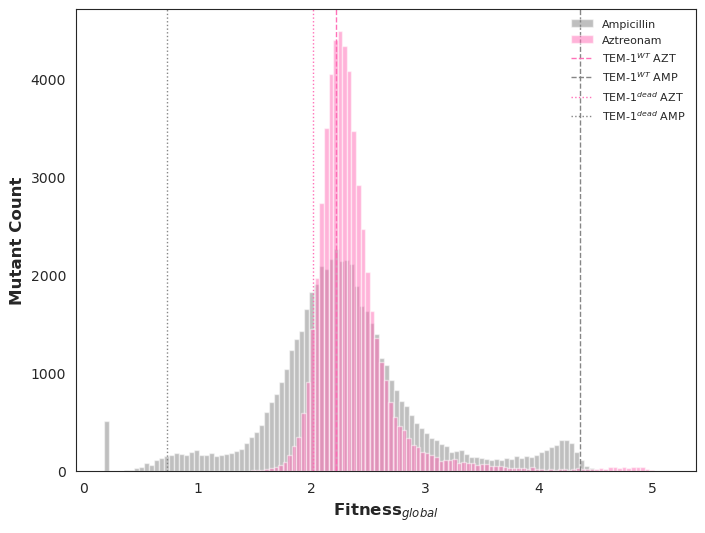

In [8]:
# Set the style
sns.set_style("white")

# Create figure and axis objects
plt.figure(figsize=(8, 6), dpi=100)

# Plot histograms
plt.hist(Epistasis_Combined_AMP_auc_10['Fitness'], bins=100, color='gray', alpha=0.5, label='Ampicillin')
plt.hist(Epistasis_Combined_AZT_auc_10['Fitness'], bins=100, color='hotpink', alpha=0.5, label='Aztreonam')

# Add vertical lines for wildtype fitness
plt.axvline(x=wt_fitness_azt, color='hotpink', linestyle='--', alpha=0.95, linewidth=1, label='TEM-1$^{WT}$ AZT')
plt.axvline(x=wt_fitness_amp, color='gray', linestyle='--', alpha=0.95, linewidth=1, label='TEM-1$^{WT}$ AMP')

# Add vertical lines for dead mutant fitness
plt.axvline(x=dead_mutant_azt, color='hotpink', linestyle=':', alpha=0.95, linewidth=1, label='TEM-1$^{dead}$ AZT')
plt.axvline(x=dead_mutant_amp, color='gray', linestyle=':', alpha=0.95, linewidth=1, label='TEM-1$^{dead}$ AMP')

# Customize the plot
plt.xlabel('Fitness$_{global}$', fontsize=12, fontweight='bold')
plt.ylabel('Mutant Count', fontsize=12, fontweight='bold')
plt.legend(frameon=False, fontsize=8)

# Save the figure
plt.savefig(PROJECT_PATH / "figures/fitness_distribution_AZT_AMP.png", 
            dpi=600, bbox_inches='tight')
plt.show()

In [9]:
resistance_cutoff = np.mean(Epistasis_Combined_AZT_auc_10['Fitness'])+3*np.std(Epistasis_Combined_AZT_auc_10['Fitness'])
print(f"Resistance cutoff for AZT: {resistance_cutoff:.3f}")
(Epistasis_Combined_AZT_auc_10['Fitness'] > resistance_cutoff).sum()

Resistance cutoff for AZT: 3.513


1191

In [10]:
amp_max_fitness = 4.75
amp_min_fitness = 0
azt_min_fitness = 1.25
azt_max_fitness = 5.25

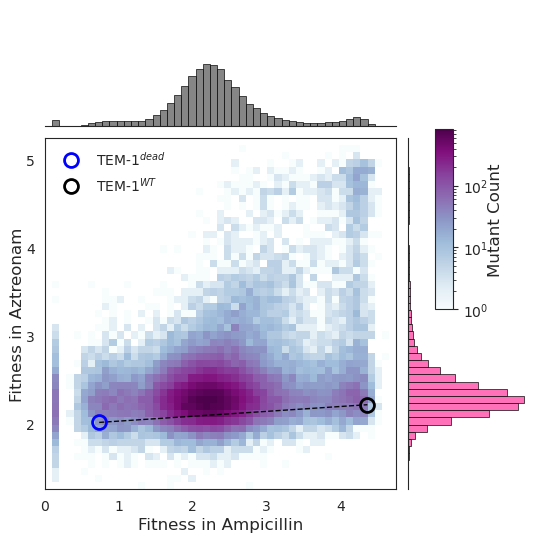

In [11]:
def plot_fitness_AMP_vs_AZT(amp_df, azt_df):
    # Create figure with a specific layout
    fig = plt.figure(figsize=(6, 6))
    
    # Create a gridspec layout
    gs = fig.add_gridspec(2, 2,  width_ratios=[3, 1], height_ratios=[1, 3],
                         left=0.1, right=0.9, bottom=0.1, top=0.9,
                         wspace=0.05, hspace=0.05)
    
    # Create the scatter plot (main plot)
    ax = fig.add_subplot(gs[1, 0])

    # Create 2D histogram with appropriate bins
    amp_bins = np.linspace(amp_min_fitness, amp_max_fitness, 50)
    azt_bins = np.linspace(azt_min_fitness, azt_max_fitness, 50)
    hist, xedges, yedges, img = ax.hist2d(
        amp_df, azt_df, bins=[amp_bins, azt_bins],
        cmap='BuPu', norm=LogNorm()
    )
    
    # Add blue circle with empty inside for origin
    ax.plot(dead_mutant_amp, dead_mutant_azt, 'o', color='blue', markersize=10, markeredgewidth=2, markerfacecolor='none', label='TEM-1$^{dead}$', zorder=10)
    # Add black circle with empty inside for WT 
    ax.plot(wt_fitness_amp, wt_fitness_azt, 'o', color='black', markersize=10, markeredgewidth=2, markerfacecolor='none', label='TEM-1$^{WT}$', zorder=10)

    # Add diagonal line
    ax.plot([dead_mutant_amp, wt_fitness_amp], [dead_mutant_azt, wt_fitness_azt], 'k--', lw=1, alpha=0.95)
    
    # Add legend
    ax.legend(frameon=False, fontsize=10, loc='upper left')
    
    # Create colorbar with fixed size and position that doesn't affect main plot
    cbar_ax = fig.add_axes([0.75, 0.4, 0.03, 0.3], zorder=100)  # [left, bottom, width, height]
    cbar = fig.colorbar(img, cax=cbar_ax)
    cbar.ax.set_ylabel('Mutant Count', fontsize=12, labelpad=0)
    
    # Create top histogram (AMP distribution)
    ax_top = fig.add_subplot(gs[0, 0], sharex=ax)
    ax_top.hist(amp_df, bins=amp_bins, color='gray', alpha=0.95, edgecolor='black', linewidth=0.5)
    ax_top.set_ylim(0.1, ax_top.get_ylim()[1])
    ax_top.tick_params(labelleft=False, labelbottom=False)  # Hide both y and x tick labels
    ax_top.set_yticks([])  # Remove y-axis ticks
    
    # Create right histogram (AZT distribution)
    ax_right = fig.add_subplot(gs[1, 1], sharey=ax)
    ax_right.hist(azt_df, bins=azt_bins, orientation='horizontal', color='hotpink', alpha=0.95, edgecolor='black', linewidth=0.5)
    ax_right.set_xlim(0.1, ax_right.get_xlim()[1])
    ax_right.tick_params(labelbottom=False, labelleft=False)  # Hide both x and y tick labels
    ax_right.set_xticks([])  # Remove x-axis ticks
    
    # Main plot settings
    ax.set_xlabel('Fitness in Ampicillin', fontsize=12, labelpad=3)
    ax.set_ylabel('Fitness in Aztreonam', fontsize=12, labelpad=1)
    
    # Set ticks
    # amp_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
    # ax.set_xticks(amp_ticks)
    # ax.set_xticklabels(amp_ticks, rotation=0, fontsize=10)
    ax.set_yticks(np.arange(np.floor(azt_min_fitness), np.ceil(azt_max_fitness)))
    # ax.set_yticklabels(azt_ticks, rotation=0, fontsize=10)
    
    # Set limits
    ax.set_xlim(amp_min_fitness, amp_max_fitness)
    ax.set_ylim(azt_min_fitness, azt_max_fitness)
    
    # Add grid
    #ax.grid(True, alpha=0.3)
    
    # Hide top and right spines for histogram subplots
    ax_top.spines['top'].set_visible(False)
    ax_top.spines['right'].set_visible(False)
    ax_top.spines['left'].set_visible(False)
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['bottom'].set_visible(False)
    
    # Get maximum counts from both histograms for setting common y-limit
    top_counts, _ = np.histogram(amp_df, bins=amp_bins)
    right_counts, _ = np.histogram(azt_df, bins=azt_bins)
    max_count = max(np.max(top_counts), np.max(right_counts))
    
    # Update y-limit for top histogram and x-limit for right histogram
    ax_top.set_ylim(0.1, max_count * 1.01)
    ax_right.set_xlim(0.1, max_count * 1.01)
    # Save the figure before showing it
    plt.savefig(PROJECT_PATH / "figures/Figure 3B. AMP vs. AZT fitness scatter plot.png", 
                    dpi=600, bbox_inches='tight')
    plt.show()

# Example usage
plot_fitness_AMP_vs_AZT(Epistasis_Combined_AMP_auc_10['Fitness'], Epistasis_Combined_AZT_auc_10['Fitness'])


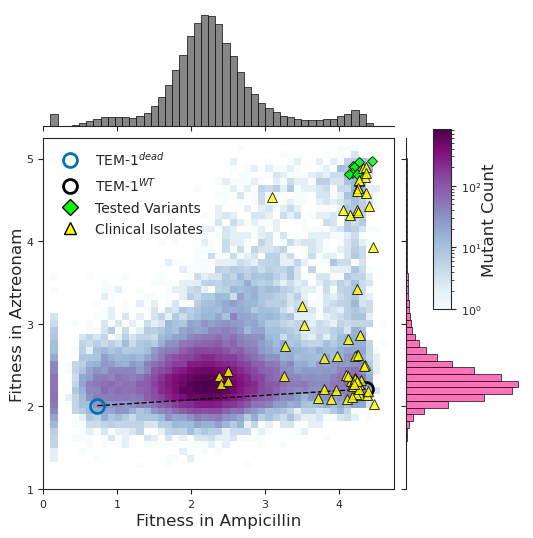

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D

def plot_fitness_AMP_vs_AZT(amp_df, azt_df):
    # Define colorblind-friendly colors
    colors = {
        'dead_mutant': '#0072B2',  # Blue
        'wild_type': '#000000',    # Black
        'tested_variants': '#00FF00',  # Bright Green
        'clinical_isolates': '#FFFF00',  # Yellow
        'histogram_side': 'gray',
        'histogram_top': 'hotpink'
    }
    # Create figure with gridspec
    fig = plt.figure(figsize=(6, 6))
    gs = fig.add_gridspec(2, 2, width_ratios=[3, 1], height_ratios=[1, 3],
                         left=0.1, right=0.9, bottom=0.1, top=0.9,
                         wspace=0.05, hspace=0.05)

    # Main scatter plot
    ax = fig.add_subplot(gs[1, 0])
    
    # Histogram bins
    amp_bins = np.linspace(amp_min_fitness, amp_max_fitness, 50)
    azt_bins = np.linspace(azt_min_fitness, azt_max_fitness, 50)
    
    # Main 2D histogram
    hist, xedges, yedges, img = ax.hist2d(
        amp_df, azt_df, bins=[amp_bins, azt_bins],
        cmap='BuPu', norm=LogNorm()
    )

    # Reference points
    ax.plot(dead_mutant_amp, dead_mutant_azt, 'o', color=colors['dead_mutant'],
            markersize=10, markeredgewidth=2, markerfacecolor='none', zorder=10)
    ax.plot(wt_fitness_amp, wt_fitness_azt, 'o', color=colors['wild_type'],
            markersize=10, markeredgewidth=2, markerfacecolor='none', zorder=10)
    ax.plot([dead_mutant_amp, wt_fitness_amp], [dead_mutant_azt, wt_fitness_azt],
            'k--', lw=1, alpha=0.95)

    # Add colorbar
    cbar_ax = fig.add_axes([0.75, 0.4, 0.03, 0.3], zorder=100)
    cbar = fig.colorbar(img, cax=cbar_ax)
    cbar.ax.set_ylabel('Mutant Count', fontsize=12, labelpad=0)

    # Top histogram
    ax_top = fig.add_subplot(gs[0, 0], sharex=ax)
    ax_top.hist(amp_df, bins=amp_bins, color=colors['histogram_side'], alpha=0.95,
                edgecolor='black', linewidth=0.5)
    ax_top.set_ylim(0.1, ax_top.get_ylim()[1])
    ax_top.tick_params(labelleft=False, labelbottom=False)
    ax_top.set_yticks([])
    ax_top.spines['top'].set_visible(False)
    ax_top.spines['right'].set_visible(False)
    ax_top.spines['left'].set_visible(False)

    # Right histogram
    ax_right = fig.add_subplot(gs[1, 1], sharey=ax)
    ax_right.hist(azt_df, bins=azt_bins, orientation='horizontal',
                 color=colors['histogram_top'], alpha=0.95, edgecolor='black', linewidth=0.5)
    ax_right.set_xlim(0.1, ax_right.get_xlim()[1])
    ax_right.tick_params(labelbottom=False, labelleft=False)
    ax_right.set_xticks([])
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['bottom'].set_visible(False)

    # Axes labels and limits
    ax.set_xlabel('Fitness in Ampicillin', fontsize=12, labelpad=3)
    ax.set_ylabel('Fitness in Aztreonam', fontsize=12, labelpad=1)
    ax.set_xlim(amp_min_fitness, amp_max_fitness)
    ax.set_ylim(azt_min_fitness, azt_max_fitness)
    ax.set_yticks(np.arange(np.floor(azt_min_fitness), np.ceil(azt_max_fitness)))

    # Add engineered variants
    extra_variants = {
        'c1.1': {'sequence': 'LQMKNTAGKRTRN'},
        'c1.2': {'sequence': 'PQMKNMAGKRMRN'},
        'c1.3': {'sequence': 'LKMKSMAGKRMRN'},
        'c2.1': {'sequence': 'LQMKNMAGKRMRN'},
        'c2.2': {'sequence': 'LKMKNMAGKRTRN'},
        'c2.3': {'sequence': 'LKMKNTAGKRTRN'},
        'c3.1': {'sequence': 'PQMKNTAGKRTRN'}
    }
    
    # Get fitness values for extra variants
    extra_amp_fitness, extra_azt_fitness, extra_labels = [], [], []
    for label, variant in extra_variants.items():
        seq = variant['sequence']
        amp_match = Epistasis_Combined_AMP_auc_10.loc[
            Epistasis_Combined_AMP_auc_10['Genotype'] == seq, 'Fitness']
        azt_match = Epistasis_Combined_AZT_auc_10.loc[
            Epistasis_Combined_AZT_auc_10['Genotype'] == seq, 'Fitness']
        if not amp_match.empty and not azt_match.empty:
            extra_amp_fitness.append(amp_match.values[0])
            extra_azt_fitness.append(azt_match.values[0])
            extra_labels.append(label)
    
    # Plot engineered variants
    ax.plot(extra_amp_fitness, extra_azt_fitness, marker='D', linestyle='none',
            markerfacecolor=colors['tested_variants'], markeredgecolor='black',
            markersize=5, markeredgewidth=.7, alpha=0.8, zorder=20)

    # Add clinical variants if available
    try:
        clinical_variants = pd.read_csv(
            "/project/greencenter/Toprak_lab/shared/plategig/projects/Ilona/spreadsheets_out/encoded_variants.csv")
        encoded_sequences = clinical_variants['Encoded_Sequence'].dropna().unique()
        
        clinical_amp_fitness, clinical_azt_fitness = [], []
        for seq in encoded_sequences:
            amp_match = Epistasis_Combined_AMP_auc_10.loc[
                Epistasis_Combined_AMP_auc_10['Genotype'] == seq, 'Fitness']
            azt_match = Epistasis_Combined_AZT_auc_10.loc[
                Epistasis_Combined_AZT_auc_10['Genotype'] == seq, 'Fitness']
            if not amp_match.empty and not azt_match.empty:
                clinical_amp_fitness.append(amp_match.values[0])
                clinical_azt_fitness.append(azt_match.values[0])
        
        ax.plot(clinical_amp_fitness, clinical_azt_fitness, marker='^', linestyle='none',
                markerfacecolor=colors['clinical_isolates'], markeredgecolor='black',
                markersize=7, markeredgewidth=.7, alpha=0.8, zorder=20)
    except Exception as e:
        print("Error loading clinical variants:", e)

    # Add legend
    custom_legend = [
        Line2D([0], [0], marker='o', linestyle='none', color=colors['dead_mutant'], label='TEM-1$^{dead}$',
               markerfacecolor='none', markersize=10, markeredgewidth=2),
        Line2D([0], [0], marker='o', linestyle='none', color=colors['wild_type'], label='TEM-1$^{WT}$',
               markerfacecolor='none', markersize=10, markeredgewidth=2),
        Line2D([0], [0], marker='D', linestyle='none', markerfacecolor=colors['tested_variants'], 
               markeredgecolor='black', markersize=8, label='Tested Variants'),
        Line2D([0], [0], marker='^', linestyle='none', markerfacecolor=colors['clinical_isolates'], 
               markeredgecolor='black', markersize=8, label='Clinical Isolates')
    ]
    ax.legend(handles=custom_legend, frameon=False, fontsize=10, loc='upper left')

    plt.show()

    return fig

fig = plot_fitness_AMP_vs_AZT(
    Epistasis_Combined_AMP_auc_10['Fitness'],
    Epistasis_Combined_AZT_auc_10['Fitness']
)
fig.savefig(PROJECT_PATH / "figures/Figure 3B. AMP vs. AZT fitness with clinical and tested variants.png",
            dpi=600, bbox_inches='tight')

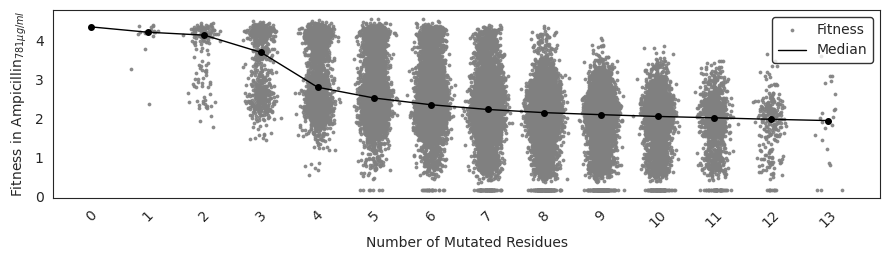

In [13]:
def plot_fitness_AMP_vs_num_mutations(Epistasis_Combined):
    fig, ax = plt.subplots(figsize=(9, 2.7))

    # Add jitter to the x-axis for orders greater than 0
    order = Epistasis_Combined['Epistatic Order']
    jitter = np.where(order > 0, np.random.normal(0, 0.11, size=len(order)), 0)
    ax.scatter(Epistasis_Combined['Epistatic Order'] + jitter, Epistasis_Combined['Fitness'], 
              s=3, alpha=0.85, color='gray', label='Fitness')

    # Calculate and plot median fitness for each order
    median_fitness = Epistasis_Combined.groupby('Epistatic Order')['Fitness'].median()
    
    # Calculate overall standard deviation for all data
    overall_std_fitness = Epistasis_Combined['Fitness'].std()
    
    # Plot median points
    for epistatic_order, median in median_fitness.items():
        ax.plot(epistatic_order, median, 'ko', markersize=4)
    
    # Add line connecting median points and create single legend entry
    ax.plot(median_fitness.index, median_fitness.values, 'k-', alpha=1, linewidth=1, label='Median')
    ax.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')

    # Customize plot appearance
    ax.set_ylabel(f'Fitness in Ampicillin$_{{781 \\mu g/ml}}$', fontsize=10)
    ax.set_xlabel('Number of Mutated Residues', fontsize=10)
    # ax.set_ylim(0.0, 1.07)
    # ax.set_xlim(-0.05, 13.3)
    ax.set_xticks(range(14))
    ax.set_xticklabels(range(14), fontsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    #ax.grid(False, alpha=0.25)

    plt.tight_layout()
    plt.savefig(PROJECT_PATH / "figures/Figure 3D. Fitness in AMP vs. number of mutations.png", 
                dpi=600, bbox_inches='tight')
    plt.show()

# Call the function for AMP
plot_fitness_AMP_vs_num_mutations(Epistasis_Combined_AMP_auc_10)


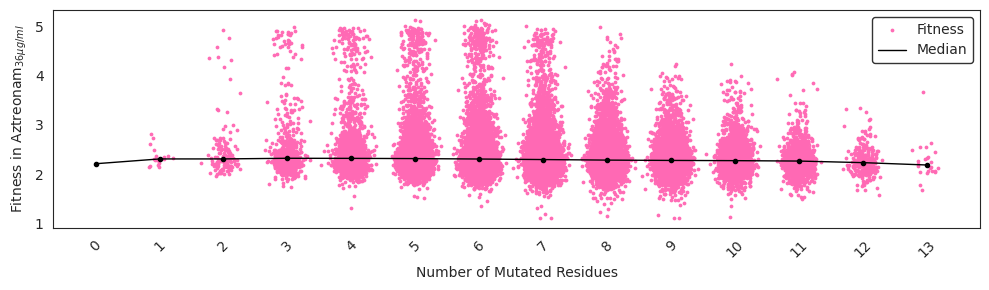

In [14]:
def plot_fitness_AZT_vs_num_mutations(Epistasis_Combined):
    fig, ax = plt.subplots(figsize=(10, 3))

    # Add jitter to the x-axis for orders greater than 0
    order = Epistasis_Combined['Epistatic Order']
    jitter = np.where(order > 0, np.random.normal(0, 0.11, size=len(order)), 0)
    ax.scatter(Epistasis_Combined['Epistatic Order'] + jitter, Epistasis_Combined['Fitness'], 
              s=3, alpha=0.95, color='hotpink', label='Fitness')

    # Calculate and plot median fitness for each order
    median_fitness = Epistasis_Combined.groupby('Epistatic Order')['Fitness'].median()
    
    # Calculate overall standard deviation for all data
    overall_std_fitness = Epistasis_Combined['Fitness'].std()
    
    # Plot median points
    for epistatic_order, median in median_fitness.items():
        ax.plot(epistatic_order, median, 'ko', markersize=3)
    
    # Add line connecting median points and create single legend entry
    ax.plot(median_fitness.index, median_fitness.values, 'k-', alpha=1, linewidth=1, label='Median')
    ax.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')

    # Customize plot appearance
    ax.set_ylabel(f'Fitness in Aztreonam$_{{36 \\mu g/ml}}$', fontsize=10)
    ax.set_xlabel('Number of Mutated Residues', fontsize=10)
    # ax.set_ylim(-0.5, 7.9)
    # ax.set_xlim(-0.05, 13.3)
    ax.set_xticks(range(14))
    ax.set_xticklabels(range(14), fontsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    #ax.grid(False, alpha=0.25)

    plt.tight_layout()
    plt.savefig(PROJECT_PATH / "figures/Figure 3E. Fitness in AZT vs. number of mutations.png", 
                dpi=600, bbox_inches='tight')
    plt.show()

# Call the function for AZT
plot_fitness_AZT_vs_num_mutations(Epistasis_Combined_AZT_auc_10)


/tmp/ipykernel_545/2150065272.py:29: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.25)


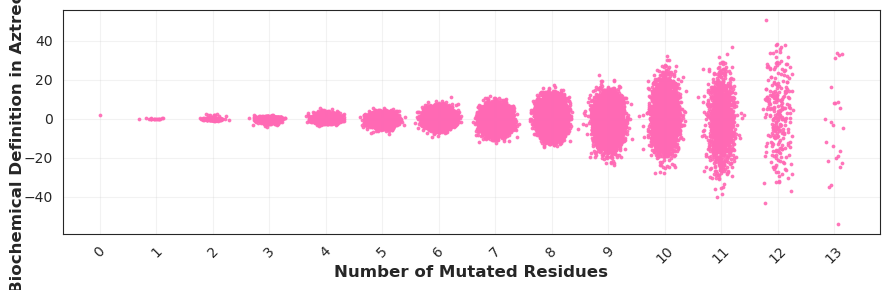

In [15]:
def plot_epistasis_biochemical_AZT_vs_num_mutations(Epistasis_Combined):
    fig, ax = plt.subplots(figsize=(9, 3))

    # Add jitter to the x-axis for orders greater than 0
    order = Epistasis_Combined['Epistatic Order']
    jitter = np.where(order > 0, np.random.normal(0, 0.11, size=len(order)), 0)
    ax.scatter(Epistasis_Combined['Epistatic Order'] + jitter, Epistasis_Combined['Biochemical Definition'], 
              s=3, alpha=0.85, color='hotpink', label='Biochemical Definition')

    # Calculate and plot median fitness for each order
    median_biochemical = Epistasis_Combined.groupby('Epistatic Order')['Biochemical Definition'].median()
    
    # Plot median points
    # for epistatic_order, median in median_biochemical.items():
    #     ax.plot(epistatic_order, median, 'ko', markersize=4)
    
    # Add line connecting median points and create single legend entry
    # ax.plot(median_biochemical.index, median_biochemical.values, 'k-', alpha=1, linewidth=1, label='Median')
    # ax.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')

    # Customize plot appearance
    ax.set_ylabel('Biochemical Definition in Aztreonam', fontsize=12, weight='bold', labelpad=-1)
    ax.set_xlabel('Number of Mutated Residues', fontsize=12, weight='bold', labelpad=-1)
    # ax.set_ylim(-50, 50)  # Adjusted y-limits based on Biochemical Definition values
    # ax.set_xlim(-0.05, 13.3)
    ax.set_xticks(range(14))
    ax.set_xticklabels(range(14), fontsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(False, alpha=0.25)

    plt.tight_layout()
    plt.savefig(PROJECT_PATH / "biochemical_definition_global_AZT_vs_num_mutations.png", 
                dpi=600, bbox_inches='tight')
    plt.show()

# Call the function for AZT
plot_epistasis_biochemical_AZT_vs_num_mutations(Epistasis_Combined_AZT_auc_10)
 

#### Plot regression accuracy as function of degree of epistasis used for regression

In [16]:
# Function to calculate R²
def calc_r2(y_true, y_pred):
        y_mean = np.mean(y_true)
        ss_tot = np.sum((y_true - y_mean) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_res / ss_tot)

/tmp/ipykernel_545/2866039525.py:46: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, alpha=0.3)


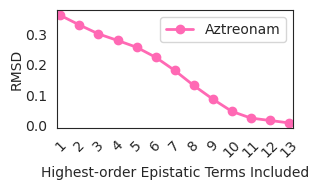

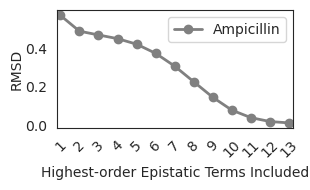

In [17]:
# Function to calculate and plot R² vs epistatic order
def plot_r2_vs_order(df, drug, max_order=13):
    rmsd_values = []
    r2_values = []
    r_values = []
    slopes = []
    rhos = []
    orders = range(1, max_order + 1)
        
    for order in orders:
        # Calculate R² for each order
        fitness_measured = df[df['Drug'] == drug]['Fitness']
        fitness_predicted = df[df['Drug'] == drug][f'Fitness_predicted for order {order}']

        # Calculate RMSD value
        rmsd = np.sqrt(np.mean((fitness_measured - fitness_predicted)**2))

        # pred_std = np.std(fitness_predicted)
        # measured_std = np.std(fitness_measured)
        correlation_matrix = np.corrcoef(fitness_measured, fitness_predicted)
        r2 = correlation_matrix[0,1]**2
        slope, intercept, r_value, p_value, std_err = stats.linregress(fitness_measured, fitness_predicted)
        # Check if fitness_measured and fitness_predicted have the same shape and are finite
        valid_indices = np.isfinite(fitness_measured) & np.isfinite(fitness_predicted)
        correlation_matrix = np.corrcoef(fitness_measured[valid_indices], fitness_predicted[valid_indices])
        r2 = correlation_matrix[0,1]**2
        #print(f"Order {order}: r = {correlation_matrix[0,1]:.5f}, R² = {r2:.5f}, slope = {slope:.5f}, r_value = {r_value:.5f}, pred_std = {pred_std:.5f}, measured_std = {measured_std:.5f}")
        r2_values.append(r2)
        slopes.append(slope)
        rhos.append(r_value)
        rmsd_values.append(rmsd)
        
    # Create plot
    fig = plt.figure(figsize=(3.2, 2))
    
    # Use full drug names in plot
    drug_name = 'Ampicillin' if drug == 'AMP' else 'Aztreonam'
    plt.plot(orders, rmsd_values, 'o-', color='gray' if drug == 'AMP' else 'hotpink', 
             linewidth=2, label=drug_name)
    
    plt.xlabel('Highest-order Epistatic Terms Included', fontsize=10)
    plt.ylabel('RMSD', fontsize=10, rotation=90, labelpad=.5)
    plt.xlim(0.8, 13.2)
    plt.xticks(range(1, 14), rotation=45, fontsize=10) # Set xticks from 1 to 13 with 45 degree rotation
    #plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], rotation=0, fontsize=10) 
    plt.grid(False, alpha=0.3)
    plt.legend(loc='upper right', fontsize=10)  # Add legend in lower right with specified font size
    # if drug == 'AZT':
    #     plt.ylim(0, 0.8)
    # elif drug == 'AMP':
    #     plt.ylim(0, 0.1)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

    return fig

# Plot R² vs order for both drugs
fig = plot_r2_vs_order(Epistasis_Combined_AZT_auc_10, 'AZT')
fig.savefig(PROJECT_PATH /f"figures/Figure 4D. RMSD vs order AZT.png", dpi=600, bbox_inches='tight')

fig = plot_r2_vs_order(Epistasis_Combined_AMP_auc_10, 'AMP')
fig.savefig(PROJECT_PATH /f"figures/Figure 4B. RMSD vs order AMP.png", dpi=600, bbox_inches='tight')

In [18]:
sns.set_style("ticks")
def plot_fitness_vs_predicted_partial(df, Drug, bin_range, gridsize=34):
    slice = df['Drug'] == Drug
    max_order = 5  # Fixed to show only first 5 orders
    
    fig, axes = plt.subplots(1, max_order, figsize=(max_order * 2.25, 2.7))

    # Set the same limits for all subplots
    x_min, x_max = bin_range
    y_min, y_max = bin_range
    xlim = ylim = (x_min, x_max)

    for order in range(1, max_order + 1):
        ax = axes[order - 1]
        fitness_measured = df.loc[slice, 'Fitness']
        fitness_predicted = df.loc[slice, f'Fitness_predicted for order {order}']
        
        # Calculate R² value
        correlation_matrix = np.corrcoef(fitness_measured, fitness_predicted)
        r2 = correlation_matrix[0,1]**2
        slope, intercept, r_value, p_value, std_err = stats.linregress(fitness_measured, fitness_predicted)
        r_squared = r_value**2
        
        # Create bins using np.linspace
        bins = np.linspace(bin_range[0], bin_range[1], gridsize)

        # Use different color palettes based on the drug
        cmap = 'Greys' if Drug == 'AMP' else 'RdPu'
        
        hist, xedges, yedges, img = ax.hist2d(fitness_measured, fitness_predicted, bins=[bins, bins], cmap=cmap, norm=LogNorm())

        # Add best fit line
        x_fit = np.array([x_min, x_max])
        y_fit = slope * x_fit + intercept
        ax.plot(x_fit, y_fit, 'b--', lw=1)

        ax.text(0.4, 0.9, f'Epistatic Order ≤ {order}', fontsize=10, fontweight='bold', ha='center', va='bottom', transform=ax.transAxes)
        # Add R² value
        ax.text(0.26, 0.78, f'$\\rho = {r_value:.2f}$', fontsize=10, color='blue',fontweight='normal', ha='center', va='bottom', transform=ax.transAxes)
        ax.set_xlabel('Fitness$_{measured}$', fontsize=12, labelpad=0, fontweight='bold')
        
        ax.set_xticks(np.arange(np.floor(x_min), np.ceil(x_max) + 0.5, 1))
        ax.set_yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 0.5, 1))
        
        if order == 1:
            ax.set_ylabel('Fitness$_{predicted}$', fontsize=12, labelpad=0, fontweight='bold')
        else:
            ax.set_yticklabels([])  # Remove y-axis values for all plots except the first one
        
        ax.plot([x_min, x_max], [y_min, y_max], 'k--', lw=1, alpha=0.95, label='y = x')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_aspect('equal')
        ax.grid(False)

    plt.tight_layout(rect=[0, 0, 1, 1], h_pad=0.3, w_pad=0.12)
    plt.show()
    return fig


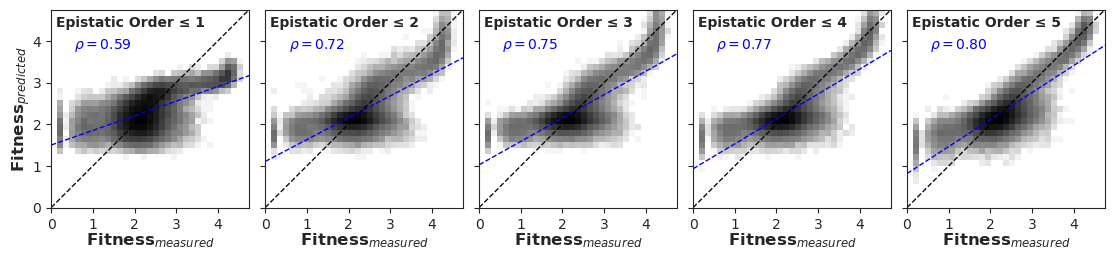

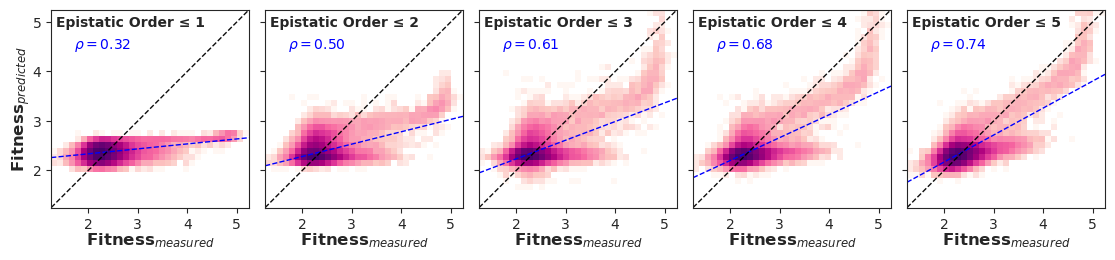

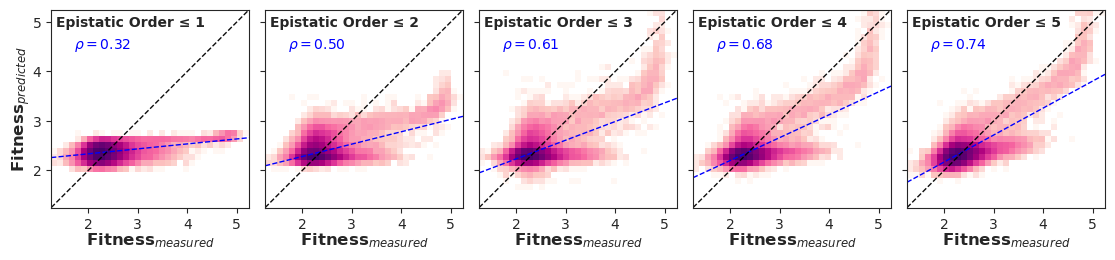

In [19]:
fig = plot_fitness_vs_predicted_partial(Epistasis_Combined_AMP_auc_10, Drug='AMP', bin_range=(amp_min_fitness, amp_max_fitness), gridsize=34)
# plt.savefig(PROJECT_PATH / f"figures/Figure 4A. Predicted fitness vs. measured.png", dpi=600, bbox_inches='tight')
plot_fitness_vs_predicted_partial(Epistasis_Combined_AZT_auc_10, Drug='AZT', bin_range=(azt_min_fitness, azt_max_fitness), gridsize=34)
# plt.savefig(PROJECT_PATH / f"figures/Figure 4C. Predicted fitness vs. measured.png", dpi=600, bbox_inches='tight')

In [20]:
def plot_fitness_vs_predicted_RMSD_partial(df, Drug, bin_range, gridsize=34):
    slice = df['Drug'] == Drug
    max_order = 3  # Fixed to show only first 5 orders
    
    fig, axes = plt.subplots(1, max_order, figsize=(max_order * 2.25, 2.7))

    # Set the same limits for all subplots
    x_min, x_max = bin_range
    y_min, y_max = bin_range
    xlim = ylim = (x_min, x_max)

    for order in range(1, max_order + 1):
        ax = axes[order - 1]
        fitness_measured = df.loc[slice, 'Fitness']
        fitness_predicted = df.loc[slice, f'Fitness_predicted for order {order}']
        
        # Calculate RMSD value
        rmsd = np.sqrt(np.mean((fitness_measured - fitness_predicted)**2))
        
        # Also calculate slope and intercept for the best fit line
        slope, intercept, r_value, p_value, std_err = stats.linregress(fitness_measured, fitness_predicted)
        
        # Create bins using np.linspace
        bins = np.linspace(bin_range[0], bin_range[1], gridsize)

        # Use different color palettes based on the drug
        cmap = 'Greys' if Drug == 'AMP' else 'RdPu'
        
        hist, xedges, yedges, img = ax.hist2d(fitness_measured, fitness_predicted, bins=[bins, bins], cmap=cmap, norm=LogNorm())

        # # Add best fit line
        # x_fit = np.array([x_min, x_max])
        # y_fit = slope * x_fit + intercept
        # ax.plot(x_fit, y_fit, 'b--', lw=1)

        ax.text(0.06, 0.9, f'Epistatic Order ≤ {order}', fontsize=10, ha='left', va='bottom', transform=ax.transAxes)
        # Add RMSD value
        ax.text(0.06, 0.78, f'RMSD = {rmsd:.3f}', fontsize=10, color='blue', fontweight='normal', ha='left', va='bottom', transform=ax.transAxes)
        ax.set_xlabel('Fitness$_{measured}$', fontsize=12, labelpad=0)
        
        ax.set_xticks(np.arange(np.floor(x_min), np.ceil(x_max) + 0.5, 1))
        ax.set_yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 0.5, 1))

        
        if order == 1:
            ax.set_ylabel('Fitness$_{predicted}$', fontsize=12, labelpad=0)
        else:
            ax.set_yticklabels([])  # Remove y-axis values for all plots except the first one
        
        ax.plot([x_min, x_max], [y_min, y_max], 'k--', lw=1, alpha=0.95, label='y = x')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_aspect('equal')
        ax.grid(False)

    plt.tight_layout(rect=[0, 0, 1, 1], h_pad=0.3, w_pad=0.12)
    plt.show()

    return fig


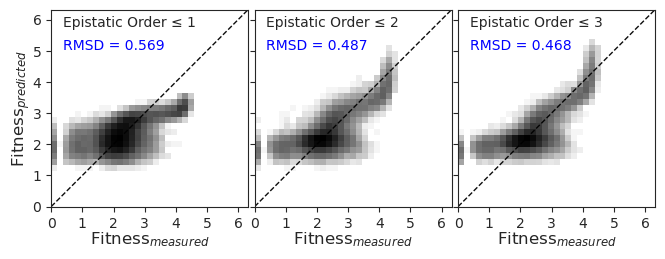

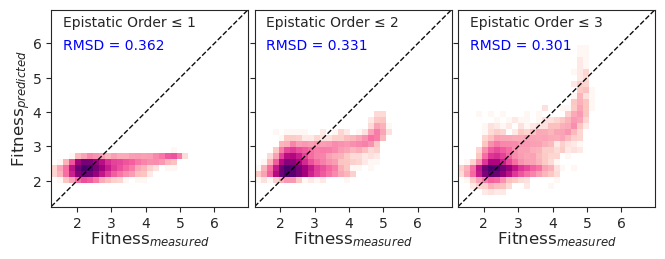

In [21]:
fig = plot_fitness_vs_predicted_RMSD_partial(Epistasis_Combined_AMP_auc_10, Drug='AMP', bin_range=(amp_min_fitness, amp_max_fitness*1.33), gridsize=34)
fig.savefig(PROJECT_PATH / f"figures/Figure 4A. Predicted fitness vs. measured.png", dpi=600, bbox_inches='tight')
fig = plot_fitness_vs_predicted_RMSD_partial(Epistasis_Combined_AZT_auc_10, Drug='AZT', bin_range=(azt_min_fitness, azt_max_fitness*1.33), gridsize=34)
fig.savefig(PROJECT_PATH / f"figures/Figure 4C. Predicted fitness vs. measured.png", dpi=600, bbox_inches='tight')

In [22]:
#I want to get a list of mutants that have fitness greater than 2, but their predicted fitness is less than 1.5 for AZT when regression is done for order 5 in Epistasis_Combined_AZT_auc_10
#in Epistasis_Combined_AZT_auc_10, find the mutants that have fitness greater than 2, but their predicted fitness is less than 1.5 for order 5
mutants_outlier = Epistasis_Combined_AZT_auc_10[(Epistasis_Combined_AZT_auc_10['Fitness'] > 2) & (Epistasis_Combined_AZT_auc_10['Fitness_predicted for order 4'] < 1)]
mutants_outlier

,Genotype,Epistatic Term,Epistatic Order,Fitness,Error,Biochemical Definition,Error_Bioch,Ensemble Averaging,Error_EA,Drug,...,Fitness_predicted for order 10,Epistasis_LG for order 11,Error_LG for order 11,Fitness_predicted for order 11,Epistasis_LG for order 12,Error_LG for order 12,Fitness_predicted for order 12,Epistasis_LG for order 13,Error_LG for order 13,Fitness_predicted for order 13


# Plot epistasis vs fitness in a heatmap. 

In [23]:
def plot_sequence_logo_with_percentiles(data1, data2, 
                                      fitness_percentile_1=(None, None),  
                                      fitness_percentile_2=(None, None)):
    # Extract bottom/upper percentile values
    bottom1 = fitness_percentile_1[1].get('Bottom') if isinstance(fitness_percentile_1[1], dict) else None
    upper1 = fitness_percentile_1[0].get('Upper') if isinstance(fitness_percentile_1[0], dict) else None
    bottom2 = fitness_percentile_2[1].get('Bottom') if isinstance(fitness_percentile_2[1], dict) else None
    upper2 = fitness_percentile_2[0].get('Upper') if isinstance(fitness_percentile_2[0], dict) else None
    
    # Generate title parts based on percentiles
    title_parts = []
    if bottom1:
        title_parts.append(f"AMP: Bottom {bottom1}%")
    elif upper1:
        title_parts.append(f"AMP: Top {upper1}%")
        
    if bottom2:
        title_parts.append(f"AZT: Bottom {bottom2}%")
    elif upper2:
        title_parts.append(f"AZT: Top {upper2}%")
    
    title = ' and '.join(title_parts)

    # Filter data based on percentile thresholds
    mask = pd.Series(True, index=data1.index)
    
    if bottom1:
        threshold = np.percentile(data1['Fitness'], bottom1)
        mask &= (data1['Fitness'] <= threshold)
    elif upper1:
        threshold = np.percentile(data1['Fitness'], 100 - upper1)
        mask &= (data1['Fitness'] >= threshold)
        
    if bottom2:
        threshold = np.percentile(data2['Fitness'], bottom2)
        mask &= (data2['Fitness'] <= threshold)
    elif upper2:
        threshold = np.percentile(data2['Fitness'], 100 - upper2)
        mask &= (data2['Fitness'] >= threshold)

    filtered_genotypes = data1[mask]
    
    # Print number of mutants that satisfy the conditions
    print(f"Number of mutants satisfying the conditions: {len(filtered_genotypes)}")
    
    if filtered_genotypes.empty:
        print("No sequences found matching the criteria.")
        return None, None

    # Create sequence logo
    try:
        sequences = filtered_genotypes['Genotype'].tolist()
        counts_df = logomaker.alignment_to_matrix(sequences, to_type='counts')
        logo = logomaker.Logo(counts_df)
        
        # Style the logo
        logo.style_spines(visible=True)
        logo.style_spines(spines=['left', 'bottom'], visible=True)
        logo.style_xticks(rotation=90, fmt='%d', anchor=0)

        # Highlight mutations and wild type
        wt_sequence = 'LQMERMAGERTRN'
        for ix, row in counts_df.iterrows():
            frequencies = row / row.sum()
            threshold = 0.55 if (row > 0).sum() == 2 else 0.37 if (row > 0).sum() == 3 else 0.275
            
            # Get the wild type amino acid for this position
            wt_aa = wt_sequence[ix]
            
            # Style each amino acid
            for aa in frequencies.index:
                if aa == wt_aa:
                    if frequencies[aa] > threshold:
                        # Wild type and dominant - magenta
                        logo.style_single_glyph(p=ix, c=aa, color='black')
                    else:
                        # Wild type but not dominant - black
                        logo.style_single_glyph(p=ix, c=aa, color='black')
                elif frequencies[aa] > threshold:
                    # Dominant mutation - red
                    logo.style_single_glyph(p=ix, c=aa, color='red')

        # Set axis labels and title
        sign_pos = [21, 39, 69, 104, 164, 182, 237, 238, 240, 244, 265, 275, 276]
        logo.ax.set_xticks(range(len(sign_pos)))
        logo.ax.set_xticklabels(sign_pos, rotation=45, fontsize=14)
        # logo.ax.set_title(title)
        plt.show()
        return logo, filtered_genotypes
    
    except Exception as e:
        print(f"Error creating sequence logo: {str(e)}")
        return None, None



Number of mutants satisfying the conditions: 553


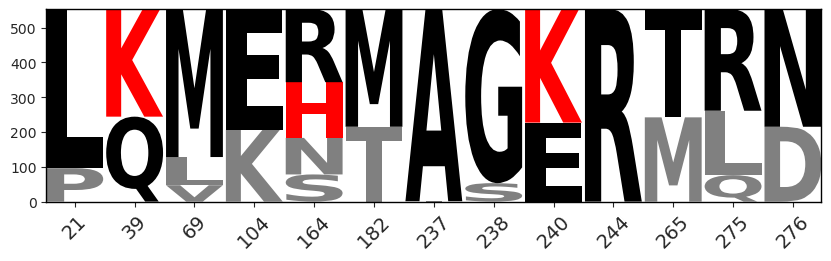

In [24]:
# Example usage with assignment of both return values
logo, filtered_data = plot_sequence_logo_with_percentiles(
    Epistasis_Combined_AMP_auc_10, 
    Epistasis_Combined_AZT_auc_10,
    fitness_percentile_1=( {'Upper': 1}, None), #AMP
    fitness_percentile_2=(None, {'Bottom': 100}) #AZT
)

logo.fig.savefig(PROJECT_PATH / "figures/Figure 3C. Sequence logo for AMP.png", dpi=600, bbox_inches='tight')

Number of mutants satisfying the conditions: 553


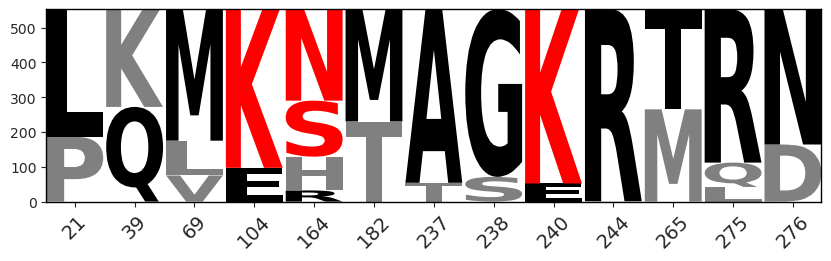

In [25]:
# Example usage with assignment of both return values
logo, filtered_data = plot_sequence_logo_with_percentiles(
    Epistasis_Combined_AMP_auc_10, 
    Epistasis_Combined_AZT_auc_10,
    fitness_percentile_1=( None, {'Bottom': 100},), #AMP
    fitness_percentile_2=({'Upper': 1}, None) #AZT
)
logo.fig.savefig(PROJECT_PATH / "figures/Figure 3C. Sequence logo for AZT.png", dpi=600, bbox_inches='tight')

In [26]:
#find a list mutants that have only one mutation by checking whether the Epistatic order is 1, also include epistatic order =0

mutants_one_mutation_AZT = Epistasis_Combined_AZT_auc_10[(Epistasis_Combined_AZT_auc_10['Epistatic Order'] == 1) | (Epistasis_Combined_AZT_auc_10['Epistatic Order'] == 0)]
sign_pos_Ambler   = [21,  39,  69, 104, 164, 182, 237, 238, 240, 244, 265, 275, 276]
#find mutated residues and their corresponding amino acids for each mutant by comparing with "LQMERMAGERTRN", if no mutation is found, then write WT
mutants_one_mutation_AZT['Mutated Residues'] = mutants_one_mutation_AZT['Genotype'].apply(lambda x: sign_pos_Ambler[next((i for i in range(len(x)) if x[i] != 'LQMERMAGERTRN'[i]), -1)] if x != 'LQMERMAGERTRN' else 'WT')
mutants_one_mutation_AZT['Mutated Amino Acids'] = mutants_one_mutation_AZT['Genotype'].apply(lambda x: next((x[i] for i in range(len(x)) if x[i] != 'LQMERMAGERTRN'[i]), 'WT') if x != 'LQMERMAGERTRN' else 'WT')

# Reorder columns to put new columns as 3rd and 4th
cols = list(mutants_one_mutation_AZT.columns)
cols.remove('Mutated Residues')
cols.remove('Mutated Amino Acids')
new_cols = cols[:2] + ['Mutated Residues', 'Mutated Amino Acids'] + cols[2:]
mutants_one_mutation_AZT = mutants_one_mutation_AZT[new_cols]
#now create a new column next to the 'Mutated Amino Acids' column that shows the mutation. name it as "Mutation". It will combine original amino acid in wild type, mutated residues and mutated amino acids. For example N in residue 276 became D. so write N276D. If no mutation is found, then write WT.

# Create a Mutation column that combines original amino acid, residue number, and mutated amino acid
wt_sequence = 'LQMERMAGERTRN'
mutants_one_mutation_AZT['Mutation'] = mutants_one_mutation_AZT.apply(
    lambda row: 'WT' if row['Mutated Amino Acids'] == 'WT' 
    else f"{wt_sequence[list(sign_pos_Ambler).index(row['Mutated Residues'])]}{row['Mutated Residues']}{row['Mutated Amino Acids']}", 
    axis=1
)

# Reorder columns to put Mutation as 4th column
cols = list(mutants_one_mutation_AZT.columns)
cols.remove('Mutation')
new_cols = cols[:4] + ['Mutation'] + cols[4:]
mutants_one_mutation_AZT = mutants_one_mutation_AZT[new_cols]

mutants_one_mutation_AZT

/tmp/ipykernel_545/3010988671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutants_one_mutation_AZT['Mutated Residues'] = mutants_one_mutation_AZT['Genotype'].apply(lambda x: sign_pos_Ambler[next((i for i in range(len(x)) if x[i] != 'LQMERMAGERTRN'[i]), -1)] if x != 'LQMERMAGERTRN' else 'WT')
/tmp/ipykernel_545/3010988671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutants_one_mutation_AZT['Mutated Amino Acids'] = mutants_one_mutation_AZT['Genotype'].apply(lambda x: next((x[i] for i in range(

,Genotype,Epistatic Term,Mutated Residues,Mutated Amino Acids,Mutation,Epistatic Order,Fitness,Error,Biochemical Definition,Error_Bioch,...,Fitness_predicted for order 10,Epistasis_LG for order 11,Error_LG for order 11,Fitness_predicted for order 11,Epistasis_LG for order 12,Error_LG for order 12,Fitness_predicted for order 12,Epistasis_LG for order 13,Error_LG for order 13,Fitness_predicted for order 13
0,LQMERMAGERTRN,0000000000000,WT,WT,WT,0,2.211270,0.037216,2.214844,0.037323,...,2.183594,2.212891,0.041504,2.212891,2.212891,0.037537,2.212891,2.214844,0.037323,2.214844
1,LQMERMAGERTRD,0000000000001,276,D,N276D,1,2.361750,0.161822,0.150391,0.166138,...,2.400391,0.169556,0.168701,2.382812,0.154175,0.166260,2.367188,0.150391,0.166138,2.365234
2,LQMERMAGERTLN,0000000000010,275,L,R275L,1,2.183950,0.076414,-0.027344,0.085022,...,2.259766,-0.009186,0.090210,2.203125,-0.019287,0.085388,2.193359,-0.027344,0.085022,2.187500
4,LQMERMAGERTQN,0000000000020,275,Q,R275Q,1,2.606954,0.224217,0.396484,0.227295,...,2.558594,0.400146,0.227783,2.613281,0.394043,0.227295,2.607422,0.396484,0.227295,2.611328
6,LQMERMAGERMRN,0000000000100,265,M,T265M,1,2.345038,0.366146,0.134521,0.367676,...,2.292969,0.119629,0.365967,2.332031,0.138306,0.367432,2.351562,0.134521,0.367676,2.349609
12,LQMERMAGESTRN,0000000001000,244,S,R244S,1,2.732881,0.100152,0.521484,0.106873,...,2.750000,0.502441,0.110596,2.714844,0.529297,0.107117,2.742188,0.521484,0.106873,2.736328
24,LQMERMAGECTRN,0000000002000,244,C,R244C,1,2.369341,0.064552,0.158203,0.074524,...,2.371094,0.186279,0.080750,2.398438,0.156250,0.075012,2.369141,0.158203,0.074524,2.373047
36,LQMERMAGKRTRN,0000000010000,240,K,E240K,1,2.302426,0.155963,0.091675,0.160156,...,2.296875,0.077515,0.162842,2.291016,0.095398,0.160400,2.308594,0.091675,0.160156,2.306641
72,LQMERMASERTRN,0000000100000,238,S,G238S,1,2.151877,0.331034,-0.058502,0.332764,...,2.212891,-0.049469,0.331543,2.164062,-0.054749,0.332520,2.158203,-0.058502,0.332764,2.156250
144,LQMERMTGERTRN,0000001000000,237,T,A237T,1,2.218709,0.080291,0.007801,0.088318,...,2.261719,0.021545,0.094910,2.234375,0.011559,0.088867,2.224609,0.007801,0.088318,2.222656


In [27]:
def plot_fitness_and_error(mutants, title, wt_fitness):
    # Create a custom sorting order for mutations
    position_order = ['WT', '21', '39', '69', '104', '164', '182', '237', '238', '240', '244', '265', '275', '276']
    
    # Create a mapping of position to sort index
    position_to_index = {str(pos): i for i, pos in enumerate(position_order)}
    
    # Create a sorting key function
    def sort_key(mutation):
        if mutation == 'WT':
            return position_to_index['WT']
        position = ''.join(filter(str.isdigit, mutation))
        return position_to_index[position]
    
    # Sort the mutants based on position
    mutants_sorted = mutants.copy()
    mutants_sorted['sort_order'] = mutants_sorted['Mutation'].apply(sort_key)
    mutants_sorted = mutants_sorted.sort_values('sort_order')
    
    fig, ax = plt.subplots(figsize=(5, 2))    
    
    # Create bar plot with sorted data and adjust width to fill space
    x = range(len(mutants_sorted))
    # Use #FFE6FF for AZT and silver for AMP
    bar_colors = ['palegreen' if mutation == 'WT' else 'hotpink' if drug == 'AZT' else 'darkgrey' 
                 for mutation, drug in zip(mutants_sorted['Mutation'], mutants_sorted['Drug'])]
    
    
    bars = plt.bar(x, mutants_sorted['Fitness'], yerr=mutants_sorted['Error'], 
            capsize=3, width=0.8, 
            color=bar_colors,
            edgecolor='black', linewidth=1,
            error_kw={'elinewidth': 1, 'capthick': 1, 'ecolor': 'black'})
    
    # Customize the plot
    plt.ylabel('Fitness', fontsize=12)
    
    # Set x-ticks to mutation names and rotate them
    plt.xticks(x, mutants_sorted['Mutation'], rotation=45, ha='center', fontsize=8)
    
    # Add horizontal line at y=1 to indicate wild type fitness
    plt.axhline(y=wt_fitness, color='black', linestyle=':', alpha=0.7)
    
    # Remove extra spacing on sides
    plt.margins(x=0.02)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plt.show()

    return fig



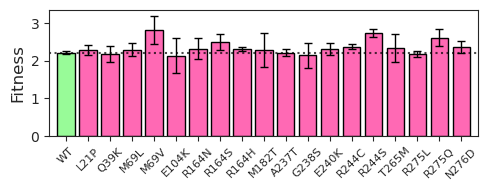

In [28]:
fig = plot_fitness_and_error(mutants_one_mutation_AZT, 'Fitness Values for Single Mutations in AZTRENOAM', wt_fitness_azt)
fig.savefig(PROJECT_PATH / "figures/Figure 5B. Fitness values for single mutations.png", dpi=600, bbox_inches='tight')

In [29]:
#find a list mutants that have only one mutation by checking whether the Epistatic order is 1, also include epistatic order =0

mutants_one_mutation_AMP = Epistasis_Combined_AMP_auc_10[(Epistasis_Combined_AMP_auc_10['Epistatic Order'] == 1) | (Epistasis_Combined_AMP_auc_10['Epistatic Order'] == 0)]
sign_pos_Ambler   = [21,  39,  69, 104, 164, 182, 237, 238, 240, 244, 265, 275, 276]
#find mutated residues and their corresponding amino acids for each mutant by comparing with "LQMERMAGERTRN", if no mutation is found, then write WT
mutants_one_mutation_AMP['Mutated Residues'] = mutants_one_mutation_AMP['Genotype'].apply(lambda x: sign_pos_Ambler[next((i for i in range(len(x)) if x[i] != 'LQMERMAGERTRN'[i]), -1)] if x != 'LQMERMAGERTRN' else 'WT')
mutants_one_mutation_AMP['Mutated Amino Acids'] = mutants_one_mutation_AMP['Genotype'].apply(lambda x: next((x[i] for i in range(len(x)) if x[i] != 'LQMERMAGERTRN'[i]), 'WT') if x != 'LQMERMAGERTRN' else 'WT')

# Reorder columns to put new columns as 3rd and 4th
cols = list(mutants_one_mutation_AMP.columns)
cols.remove('Mutated Residues')
cols.remove('Mutated Amino Acids')
new_cols = cols[:2] + ['Mutated Residues', 'Mutated Amino Acids'] + cols[2:]
mutants_one_mutation_AMP = mutants_one_mutation_AMP[new_cols]

# Create a Mutation column that combines original amino acid, residue number, and mutated amino acid
wt_sequence = 'LQMERMAGERTRN'
mutants_one_mutation_AMP['Mutation'] = mutants_one_mutation_AMP.apply(
    lambda row: 'WT' if row['Mutated Amino Acids'] == 'WT' 
    else f"{wt_sequence[list(sign_pos_Ambler).index(row['Mutated Residues'])]}{row['Mutated Residues']}{row['Mutated Amino Acids']}", 
    axis=1
)

# Reorder columns to put Mutation as 4th column
cols = list(mutants_one_mutation_AMP.columns)
cols.remove('Mutation')
new_cols = cols[:4] + ['Mutation'] + cols[4:]
mutants_one_mutation_AMP = mutants_one_mutation_AMP[new_cols]

#mutants_one_mutation_AMP


/tmp/ipykernel_545/4567736.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutants_one_mutation_AMP['Mutated Residues'] = mutants_one_mutation_AMP['Genotype'].apply(lambda x: sign_pos_Ambler[next((i for i in range(len(x)) if x[i] != 'LQMERMAGERTRN'[i]), -1)] if x != 'LQMERMAGERTRN' else 'WT')
/tmp/ipykernel_545/4567736.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutants_one_mutation_AMP['Mutated Amino Acids'] = mutants_one_mutation_AMP['Genotype'].apply(lambda x: next((x[i] for i in range(len(x)

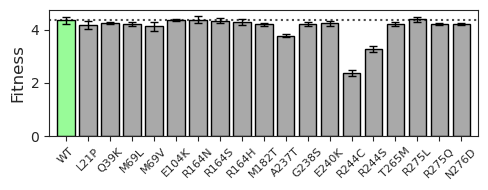

In [30]:
fig = plot_fitness_and_error(mutants_one_mutation_AMP, 'Fitness Values for Single Mutations in Ampicillin', wt_fitness_amp)
fig.savefig(PROJECT_PATH / "figures/Figure 5A. Fitness values for single mutations.png", dpi=600, bbox_inches='tight')

In [31]:
pd.concat([
    mutants_one_mutation_AZT.iloc[0:1],  # Get first row (WT) from AZT
    mutants_one_mutation_AMP.iloc[1:].sort_values('Mutated Residues')  # Get rest from AMP sorted
])['Mutation'].to_list()

['WT',
 'L21P',
 'Q39K',
 'M69V',
 'M69L',
 'E104K',
 'R164N',
 'R164H',
 'R164S',
 'M182T',
 'A237T',
 'G238S',
 'E240K',
 'R244C',
 'R244S',
 'T265M',
 'R275Q',
 'R275L',
 'N276D']

In [32]:
mutations = pd.concat([
    mutants_one_mutation_AZT.iloc[0:1],  # Get first row (WT) from AZT
    mutants_one_mutation_AMP.iloc[1:].sort_values('Mutated Residues')  # Get rest from AMP sorted
])['Mutation'].to_list()
mutations

['WT',
 'L21P',
 'Q39K',
 'M69V',
 'M69L',
 'E104K',
 'R164N',
 'R164H',
 'R164S',
 'M182T',
 'A237T',
 'G238S',
 'E240K',
 'R244C',
 'R244S',
 'T265M',
 'R275Q',
 'R275L',
 'N276D']

In [33]:
#find all the mutants in Epistasis_Combined_AZT_auc_10 with 0, 1, 2 mutations.
mutants_0_1_2_mutations_AMP = Epistasis_Combined_AMP_auc_10[(Epistasis_Combined_AMP_auc_10['Epistatic Order'] <= 2)]

sign_pos_Ambler = [21, 39, 69, 104, 164, 182, 237, 238, 240, 244, 265, 275, 276]
wt_sequence = 'LQMERMAGERTRN'

# Find mutated residues and amino acids
mutants_0_1_2_mutations_AMP['Mutated Residues'] = mutants_0_1_2_mutations_AMP['Genotype'].apply(
    lambda x: [sign_pos_Ambler[i] for i in range(len(x)) if x[i] != wt_sequence[i]] if x != wt_sequence else ['WT']
)
mutants_0_1_2_mutations_AMP['Mutated Amino Acids'] = mutants_0_1_2_mutations_AMP['Genotype'].apply(
    lambda x: [x[i] for i in range(len(x)) if x[i] != wt_sequence[i]] if x != wt_sequence else ['WT']
)

# Create Mutations column
def create_mutation_string(row):
    if row['Mutated Residues'] == ['WT']:
        return 'WT'
    return '; '.join([f"{wt_sequence[list(sign_pos_Ambler).index(pos)]}{pos}{aa}" 
                     for pos, aa in zip(row['Mutated Residues'], row['Mutated Amino Acids'])])

mutants_0_1_2_mutations_AMP['Mutations'] = mutants_0_1_2_mutations_AMP.apply(create_mutation_string, axis=1)

# Reorder columns
cols = list(mutants_0_1_2_mutations_AMP.columns)
cols.remove('Mutated Residues')
cols.remove('Mutated Amino Acids')
cols.remove('Mutations')
new_cols = cols[:2] + ['Mutated Residues', 'Mutated Amino Acids', 'Mutations'] + cols[2:]
mutants_0_1_2_mutations_AMP = mutants_0_1_2_mutations_AMP[new_cols]

mutants_0_1_2_mutations_AMP

/tmp/ipykernel_545/1382188498.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutants_0_1_2_mutations_AMP['Mutated Residues'] = mutants_0_1_2_mutations_AMP['Genotype'].apply(
/tmp/ipykernel_545/1382188498.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutants_0_1_2_mutations_AMP['Mutated Amino Acids'] = mutants_0_1_2_mutations_AMP['Genotype'].apply(
/tmp/ipykernel_545/1382188498.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Genotype,Epistatic Term,Mutated Residues,Mutated Amino Acids,Mutations,Epistatic Order,Fitness,Error,Biochemical Definition,Error_Bioch,...,Fitness_predicted for order 10,Epistasis_LG for order 11,Error_LG for order 11,Fitness_predicted for order 11,Epistasis_LG for order 12,Error_LG for order 12,Fitness_predicted for order 12,Epistasis_LG for order 13,Error_LG for order 13,Fitness_predicted for order 13
0,LQMERMAGERTRN,0000000000000,[WT],[WT],WT,0,4.360055,0.127176,4.367188,0.127441,...,4.371094,4.394531,0.128662,4.394531,4.351562,0.127319,4.351562,4.367188,0.127441,4.367188
1,LQMERMAGERTRD,0000000000001,[276],[D],N276D,1,4.225780,0.032640,-0.132812,0.131348,...,4.207031,-0.179688,0.137573,4.214844,-0.101074,0.131714,4.250000,-0.132812,0.131348,4.234375
2,LQMERMAGERTLN,0000000000010,[275],[L],R275L,1,4.396546,0.098609,0.039062,0.161011,...,4.414062,-0.001526,0.164307,4.394531,0.073547,0.161133,4.425781,0.039062,0.161011,4.406250
3,LQMERMAGERTLD,0000000000011,"[275, 276]","[L, D]",R275L; N276D,2,4.291280,0.094923,0.027344,0.189697,...,4.292969,0.131104,0.201416,4.343750,-0.041626,0.190918,4.281250,0.027344,0.189697,4.300781
4,LQMERMAGERTQN,0000000000020,[275],[Q],R275Q,1,4.218353,0.041476,-0.140625,0.133789,...,4.203125,-0.185547,0.138428,4.210938,-0.127441,0.134033,4.222656,-0.140625,0.133789,4.226562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29376,PQMENMAGERTRN,1000300000000,"[21, 164]","[P, N]",L21P; R164N,2,4.434074,0.108661,0.222534,0.257080,...,4.398438,0.343018,0.262207,4.472656,0.180908,0.257568,4.437500,0.222534,0.257080,4.441406
29952,PQMKRMAGERTRN,1001000000000,"[21, 104]","[P, K]",L21P; E104K,2,4.388089,0.075966,0.179565,0.209961,...,4.394531,0.254883,0.221191,4.410156,0.116028,0.211304,4.378906,0.179565,0.209961,4.394531
32256,PQLERMAGERTRN,1010000000000,"[21, 69]","[P, L]",L21P; M69L,2,4.088439,0.077288,0.039062,0.223022,...,4.128906,0.060242,0.230957,4.089844,0.006386,0.223877,4.097656,0.039062,0.223022,4.097656
36864,PQVERMAGERTRN,1020000000000,"[21, 69]","[P, V]",L21P; M69V,2,3.987042,0.125779,0.033203,0.279297,...,3.994141,0.065796,0.286133,3.986328,-0.029053,0.280273,3.980469,0.033203,0.279297,3.994141


In [34]:
#find all the mutants in Epistasis_Combined_AZT_auc_10 with 0, 1, 2 mutations.
mutants_0_1_2_mutations_AZT = Epistasis_Combined_AZT_auc_10[(Epistasis_Combined_AZT_auc_10['Epistatic Order'] <= 2)]

sign_pos_Ambler = [21, 39, 69, 104, 164, 182, 237, 238, 240, 244, 265, 275, 276]
wt_sequence = 'LQMERMAGERTRN'

# Find mutated residues and amino acids
mutants_0_1_2_mutations_AZT['Mutated Residues'] = mutants_0_1_2_mutations_AZT['Genotype'].apply(
    lambda x: [sign_pos_Ambler[i] for i in range(len(x)) if x[i] != wt_sequence[i]] if x != wt_sequence else ['WT']
)
mutants_0_1_2_mutations_AZT['Mutated Amino Acids'] = mutants_0_1_2_mutations_AZT['Genotype'].apply(
    lambda x: [x[i] for i in range(len(x)) if x[i] != wt_sequence[i]] if x != wt_sequence else ['WT']
)

# Create Mutations column
def create_mutation_string(row):
    if row['Mutated Residues'] == ['WT']:
        return 'WT'
    return '; '.join([f"{wt_sequence[list(sign_pos_Ambler).index(pos)]}{pos}{aa}" 
                     for pos, aa in zip(row['Mutated Residues'], row['Mutated Amino Acids'])])

mutants_0_1_2_mutations_AZT['Mutations'] = mutants_0_1_2_mutations_AZT.apply(create_mutation_string, axis=1)

# Reorder columns
cols = list(mutants_0_1_2_mutations_AZT.columns)
cols.remove('Mutated Residues')
cols.remove('Mutated Amino Acids')
cols.remove('Mutations')
new_cols = cols[:2] + ['Mutated Residues', 'Mutated Amino Acids', 'Mutations'] + cols[2:]
mutants_0_1_2_mutations_AZT = mutants_0_1_2_mutations_AZT[new_cols]

mutants_0_1_2_mutations_AZT

/tmp/ipykernel_545/1818946781.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutants_0_1_2_mutations_AZT['Mutated Residues'] = mutants_0_1_2_mutations_AZT['Genotype'].apply(
/tmp/ipykernel_545/1818946781.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutants_0_1_2_mutations_AZT['Mutated Amino Acids'] = mutants_0_1_2_mutations_AZT['Genotype'].apply(
/tmp/ipykernel_545/1818946781.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Genotype,Epistatic Term,Mutated Residues,Mutated Amino Acids,Mutations,Epistatic Order,Fitness,Error,Biochemical Definition,Error_Bioch,...,Fitness_predicted for order 10,Epistasis_LG for order 11,Error_LG for order 11,Fitness_predicted for order 11,Epistasis_LG for order 12,Error_LG for order 12,Fitness_predicted for order 12,Epistasis_LG for order 13,Error_LG for order 13,Fitness_predicted for order 13
0,LQMERMAGERTRN,0000000000000,[WT],[WT],WT,0,2.211270,0.037216,2.214844,0.037323,...,2.183594,2.212891,0.041504,2.212891,2.212891,0.037537,2.212891,2.214844,0.037323,2.214844
1,LQMERMAGERTRD,0000000000001,[276],[D],N276D,1,2.361750,0.161822,0.150391,0.166138,...,2.400391,0.169556,0.168701,2.382812,0.154175,0.166260,2.367188,0.150391,0.166138,2.365234
2,LQMERMAGERTLN,0000000000010,[275],[L],R275L,1,2.183950,0.076414,-0.027344,0.085022,...,2.259766,-0.009186,0.090210,2.203125,-0.019287,0.085388,2.193359,-0.027344,0.085022,2.187500
3,LQMERMAGERTLD,0000000000011,"[275, 276]","[L, D]",R275L; N276D,2,2.239787,0.105130,-0.093750,0.210815,...,2.205078,-0.167969,0.216675,2.205078,-0.109802,0.211304,2.238281,-0.093750,0.210815,2.244141
4,LQMERMAGERTQN,0000000000020,[275],[Q],R275Q,1,2.606954,0.224217,0.396484,0.227295,...,2.558594,0.400146,0.227783,2.613281,0.394043,0.227295,2.607422,0.396484,0.227295,2.611328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29376,PQMENMAGERTRN,1000300000000,"[21, 164]","[P, N]",L21P; R164N,2,2.440089,0.246382,0.042908,0.386963,...,2.396484,0.032715,0.386230,2.443359,0.046082,0.386963,2.445312,0.042908,0.386963,2.443359
29952,PQMKRMAGERTRN,1001000000000,"[21, 104]","[P, K]",L21P; E104K,2,3.643962,0.039069,1.434570,0.492432,...,3.535156,1.404297,0.488770,3.632812,1.427734,0.491943,3.646484,1.434570,0.492432,3.648438
32256,PQLERMAGERTRN,1010000000000,"[21, 69]","[P, L]",L21P; M69L,2,2.157452,0.433887,-0.208984,0.486328,...,2.166016,-0.223877,0.483154,2.154297,-0.207642,0.485840,2.164062,-0.208984,0.486328,2.162109
36864,PQVERMAGERTRN,1020000000000,"[21, 69]","[P, V]",L21P; M69V,2,2.519615,0.361253,-0.365234,0.535645,...,2.486328,-0.358398,0.531738,2.531250,-0.376953,0.535156,2.519531,-0.365234,0.535645,2.523438


In [35]:
# Get all unique mutations, sorted appropriately
def get_sorted_mutations():
    # Create a custom sorting order for mutations
    position_order = ['WT', '21', '39', '69', '104', '164', '182', '237', '238', '240', '244', '265', '275', '276']
    
    # Create a mapping of position to sort index
    position_to_index = {str(pos): i for i, pos in enumerate(position_order)}
    
    # Create a sorting key function
    def sort_key(mutation):
        if mutation == 'WT':
            return position_to_index['WT']
        position = ''.join(filter(str.isdigit, mutation))
        return position_to_index[position]
    
    # Get unique mutations from both AZT and AMP data
    mutations_azt = mutants_one_mutation_AZT['Mutation'].unique()
    mutations_amp = mutants_one_mutation_AMP['Mutation'].unique()
    
    # Combine and get unique mutations
    all_mutations = sorted(set(list(mutations_azt) + list(mutations_amp)), key=sort_key)
    
    return all_mutations

# Get sorted mutations
mutations = get_sorted_mutations()

/tmp/ipykernel_545/1042292709.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


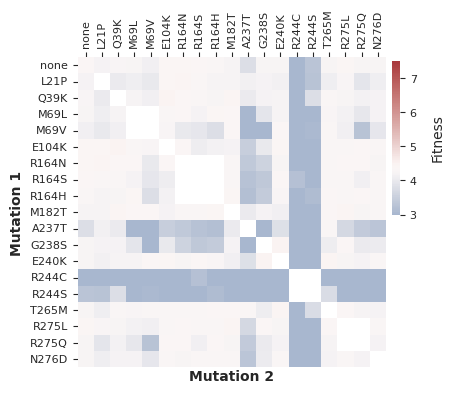

In [36]:
def create_summary_heatmap(df, mutations):
    # Initialize a square matrix with NaN values
    size = len(mutations)
    matrix = np.full((size, size), np.nan)

    # Fill the matrix with fitness values
    for _, row in df.iterrows():
        if row['Mutations'] == 'WT':
            i, j = 0, 0
            matrix[i, j] = row['Fitness']
        elif '; ' not in row['Mutations']:  # Single mutation
            try:
                i = mutations.index('WT')
                j = mutations.index(row['Mutations'])
                matrix[j, i] = row['Fitness']
                matrix[i, j] = row['Fitness']  # Mirror the value
            except ValueError:
                continue
        elif len(row['Mutations'].split('; ')) == 2:  # Double mutation
            try:
                mut1, mut2 = row['Mutations'].split('; ')
                i = mutations.index(mut1)
                j = mutations.index(mut2)
                matrix[j, i] = row['Fitness']
                matrix[i, j] = row['Fitness']  # Mirror the value
            except ValueError:
                continue

    # Create custom colormap where 1 is white, values below are blue, above are red
    cmap = sns.color_palette("vlag", as_cmap=True)

    plt.rcParams['font.size'] = 8

    # Create the heatmap
    plt.figure(figsize=(4, 4))
    # Create heatmap
    heatmap = sns.heatmap(matrix, 
                annot=False,  # Remove annotations
                cmap=cmap,    # Use custom colormap
                center=wt_fitness_amp,     # Center the colormap at 1
                vmin=3,      # Set minimum value
                vmax=7.5,      # Set maximum value
                cbar_kws={'label': 'Fitness',
                         'use_gridspec': False,
                         'location': 'right', 
                         'pad': 0.01,
                         'fraction': 0.1,
                         'shrink': 0.5,  # Reduce height by half
                         'anchor': (2.8, 0.9)}) # Move colorbar up by setting anchor point
    
    # Modify colorbar label font size after creation
    cbar = heatmap.collections[0].colorbar
    cbar.ax.set_ylabel('Fitness', fontsize=10, labelpad=10)
    
    # Replace 'WT' with 'none' in x-axis labels
    x_labels = ['none' if x == 'WT' else x for x in mutations]
    y_labels = ['none' if x == 'WT' else x for x in mutations]
    
    # Set x-axis and y-axis labels
    plt.xticks(ticks=np.arange(size) + 0.5, labels=x_labels, rotation=90, ha='center', va='bottom')
    ax = plt.gca()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.yticks(ticks=np.arange(size) + 0.5, labels=y_labels, rotation=0)
    
    # Add axis labels
    plt.xlabel('Mutation 2', fontsize=10, fontweight='bold', labelpad=-267)
    plt.ylabel('Mutation 1', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(PROJECT_PATH /"figures/Figure 5C. Double mutants fitness AMP.png", 
                dpi=600, bbox_inches='tight')
    plt.show()


create_summary_heatmap(mutants_0_1_2_mutations_AMP, mutations)


/tmp/ipykernel_545/2128006326.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


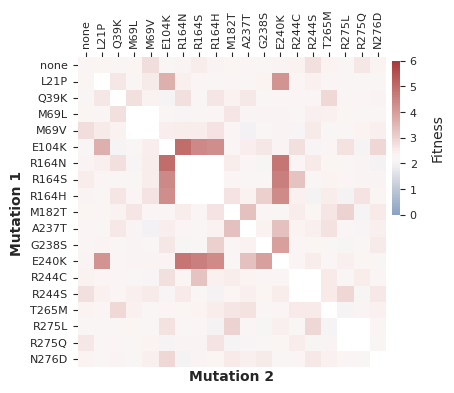

In [37]:
def create_summary_heatmap(df, mutations):
    # Initialize a square matrix with NaN values
    size = len(mutations)
    matrix = np.full((size, size), np.nan)

    # Fill the matrix with fitness values
    for _, row in df.iterrows():
        if row['Mutations'] == 'WT':
            i, j = 0, 0
            matrix[i, j] = row['Fitness']
        elif '; ' not in row['Mutations']:  # Single mutation
            try:
                i = mutations.index('WT')
                j = mutations.index(row['Mutations'])
                matrix[j, i] = row['Fitness']
                matrix[i, j] = row['Fitness']  # Mirror the value
            except ValueError:
                continue
        elif len(row['Mutations'].split('; ')) == 2:  # Double mutation
            try:
                mut1, mut2 = row['Mutations'].split('; ')
                i = mutations.index(mut1)
                j = mutations.index(mut2)
                matrix[j, i] = row['Fitness']
                matrix[i, j] = row['Fitness']  # Mirror the value
            except ValueError:
                continue

    # Create custom colormap where 1 is white, values below are blue, above are red
    cmap = sns.color_palette("vlag", as_cmap=True)

    plt.rcParams['font.size'] = 8

    # Create the heatmap
    plt.figure(figsize=(4, 4))
    # Create heatmap
    heatmap = sns.heatmap(matrix, 
                annot=False,  # Remove annotations
                cmap=cmap,    # Use custom colormap
                center=wt_fitness_azt,     # Center the colormap at 1
                vmin=0,      # Set minimum value
                vmax=6,      # Set maximum value
                cbar_kws={'label': 'Fitness',
                         'use_gridspec': False,
                         'location': 'right', 
                         'pad': 0.01,
                         'fraction': 0.1,
                         'shrink': 0.5,  # Reduce height by half
                         'anchor': (2.8, 0.9)}) # Move colorbar up by setting anchor point
    
    # Modify colorbar label font size after creation
    cbar = heatmap.collections[0].colorbar
    cbar.ax.set_ylabel('Fitness', fontsize=10, labelpad=10)
    
    # Replace 'WT' with 'none' in x-axis labels
    x_labels = ['none' if x == 'WT' else x for x in mutations]
    y_labels = ['none' if x == 'WT' else x for x in mutations]
    
    # Set x-axis and y-axis labels
    plt.xticks(ticks=np.arange(size) + 0.5, labels=x_labels, rotation=90, ha='center', va='bottom')
    ax = plt.gca()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.yticks(ticks=np.arange(size) + 0.5, labels=y_labels, rotation=0)
    
    # Add axis labels
    plt.xlabel('Mutation 2', fontsize=10, fontweight='bold', labelpad=-267)
    plt.ylabel('Mutation 1', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(PROJECT_PATH /"figures/Figure 5D. Double mutants fitness AZT.png", 
                dpi=600, bbox_inches='tight')
    plt.show()


create_summary_heatmap(mutants_0_1_2_mutations_AZT, mutations)


In [38]:
def phenotype_summary_heatmap(df, mutations, column_name, vmin=None, vmax=None, save_path=None):
    """
    Create a heatmap for any phenotype column in the dataset.
    
    Args:
        df (DataFrame): Input dataframe
        mutations (list): List of mutations
        column_name (str): Name of the column to visualize
        vmin (float, optional): Minimum value for colorbar
        vmax (float, optional): Maximum value for colorbar
        save_path (str, optional): Path to save the figure
    """
    # Initialize a square matrix with NaN values
    size = len(mutations)
    matrix = np.full((size, size), np.nan)

    # Fill the matrix with values
    for _, row in df.iterrows():
        if '; ' not in row['Mutations']:  # Single mutation
            try:
                if row['Mutations'] != 'WT':  # Skip WT-WT interaction
                    i = mutations.index('WT')
                    j = mutations.index(row['Mutations'])
                    matrix[j, i] = row[column_name]
                    matrix[i, j] = row[column_name]  # Mirror the value
            except ValueError:
                continue
        elif len(row['Mutations'].split('; ')) == 2:  # Double mutation
            try:
                mut1, mut2 = row['Mutations'].split('; ')
                i = mutations.index(mut1)
                j = mutations.index(mut2)
                matrix[j, i] = row[column_name]
                matrix[i, j] = row[column_name]  # Mirror the value
            except ValueError:
                continue

    # Create custom colormap with white at center
    cmap = sns.color_palette("vlag", as_cmap=True)
    
    # Set figure size and font settings
    plt.figure(figsize=(4, 4))
    plt.rcParams['font.size'] = 8
    
    #
    heatmap = sns.heatmap(matrix,
                         cmap=cmap,
                         center=0,
                         vmin=vmin if vmin is not None else -1,
                         vmax=vmax if vmax is not None else 1,
                         cbar_kws={'label': column_name,
                                 'use_gridspec': False,
                                 'location': 'right',
                                 'pad': 0.01,
                                 'fraction': 0.1,
                                 'shrink': 0.5,
                                 'anchor': (2.8, 0.9)})
    
    # Modify colorbar label font size
    cbar = heatmap.collections[0].colorbar
    cbar.ax.set_ylabel("Pairwise Epistasis", fontsize=10, labelpad=10)
    
    # Replace 'WT' with 'none' in labels
    x_labels = ['none' if x == 'WT' else x for x in mutations]
    y_labels = ['none' if x == 'WT' else x for x in mutations]
    
    # Set x-axis and y-axis labels
    plt.xticks(ticks=np.arange(size) + 0.5, labels=x_labels, rotation=90, ha='center', va='bottom')
    ax = plt.gca()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.yticks(ticks=np.arange(size) + 0.5, labels=y_labels, rotation=0)
    
    # Add axis labels
    plt.xlabel('Mutation 2', fontsize=10, fontweight='bold', labelpad=-267)
    plt.ylabel('Mutation 1', fontsize=10, fontweight='bold')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=1200, bbox_inches='tight')
    
    plt.show()


/tmp/ipykernel_545/347257168.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


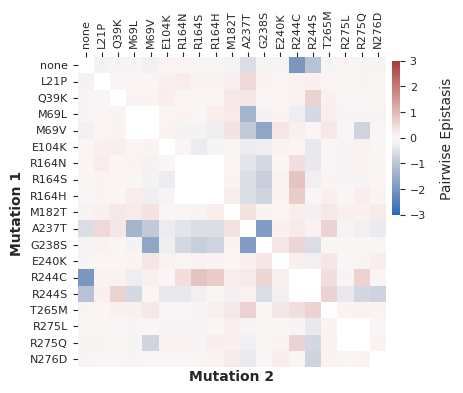

In [39]:
phenotype_summary_heatmap(mutants_0_1_2_mutations_AMP, mutations, 'Biochemical Definition',
                          vmin=-3, vmax=3,
                          save_path=PROJECT_PATH / "figures/Figure 5E. Double mutants pairwise epistasis AMP.png")

In [40]:
def phenotype_summary_heatmap(df, mutations, column_name, vmin=None, vmax=None, save_path=None):
    """
    Create a heatmap for any phenotype column in the dataset.
    
    Args:
        df (DataFrame): Input dataframe
        mutations (list): List of mutations
        column_name (str): Name of the column to visualize
        vmin (float, optional): Minimum value for colorbar
        vmax (float, optional): Maximum value for colorbar
        save_path (str, optional): Path to save the figure
    """
    # Initialize a square matrix with NaN values
    size = len(mutations)
    matrix = np.full((size, size), np.nan)

    # Fill the matrix with values
    for _, row in df.iterrows():
        if '; ' not in row['Mutations']:  # Single mutation
            try:
                if row['Mutations'] != 'WT':  # Skip WT-WT interaction
                    i = mutations.index('WT')
                    j = mutations.index(row['Mutations'])
                    matrix[j, i] = row[column_name]
                    matrix[i, j] = row[column_name]  # Mirror the value
            except ValueError:
                continue
        elif len(row['Mutations'].split('; ')) == 2:  # Double mutation
            try:
                mut1, mut2 = row['Mutations'].split('; ')
                i = mutations.index(mut1)
                j = mutations.index(mut2)
                matrix[j, i] = row[column_name]
                matrix[i, j] = row[column_name]  # Mirror the value
            except ValueError:
                continue

    # Create custom colormap with white at center
    cmap = sns.color_palette("vlag", as_cmap=True)
    
    # Set figure size and font settings
    plt.figure(figsize=(4, 4))
    plt.rcParams['font.size'] = 8
    
    # Create heatmap
    heatmap = sns.heatmap(matrix,
                         cmap=cmap,
                         center=0,
                         vmin=vmin if vmin is not None else -1,
                         vmax=vmax if vmax is not None else 1,
                         cbar_kws={'label': column_name,
                                 'use_gridspec': False,
                                 'location': 'right',
                                 'pad': 0.01,
                                 'fraction': 0.1,
                                 'shrink': 0.5,
                                 'anchor': (2.8, 0.9)})
    
    # Modify colorbar label font size
    cbar = heatmap.collections[0].colorbar
    cbar.ax.set_ylabel("Pairwise Epistasis", fontsize=10, labelpad=10)
    
    # Replace 'WT' with 'none' in labels
    x_labels = ['none' if x == 'WT' else x for x in mutations]
    y_labels = ['none' if x == 'WT' else x for x in mutations]
    
    # Set x-axis and y-axis labels
    plt.xticks(ticks=np.arange(size) + 0.5, labels=x_labels, rotation=90, ha='center', va='bottom')
    ax = plt.gca()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.yticks(ticks=np.arange(size) + 0.5, labels=y_labels, rotation=0, ha='right', va='center')
    
    # Add axis labels
    plt.xlabel('Mutation 2', fontsize=10, fontweight='bold', labelpad=-267)
    plt.ylabel('Mutation 1', fontsize=10, fontweight='bold')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=1200, bbox_inches='tight')
    
    plt.show()


/tmp/ipykernel_545/2383262465.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


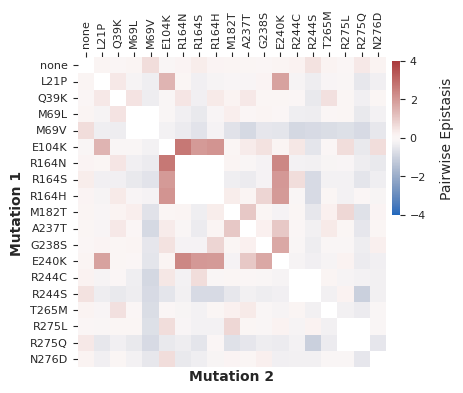

In [41]:
phenotype_summary_heatmap(mutants_0_1_2_mutations_AZT, mutations, 'Biochemical Definition', vmin=-4, vmax=4,
                          save_path=PROJECT_PATH / "figures/Figure 5F. Double mutants pairwise epistasis AZT.png")

In [42]:
import itertools

sign_pos_Ambler   = [21,  39,  69, 104, 164, 182, 237, 238, 240, 244, 265, 275, 276]

def generate_filter_criteria_from_mutations(mutation_list, baseline_genotype, include_wt=True):
    """Generate all valid, non-conflicting mutation combinations."""
    filter_criteria = []

    if include_wt:
        filter_criteria.append({
            "Genotype": baseline_genotype,
            "Epistatic Order": 0,
            "Mutant": "Baseline"
        })

    for r in range(1, len(mutation_list) + 1):
        for combo in itertools.combinations(mutation_list, r):

            positions = [np.searchsorted(sign_pos_Ambler, int(''.join(filter(str.isdigit, mut)))) for mut in combo]
            if len(set(positions)) < len(positions):
                continue  # skip combinations with multiple mutations at the same position

            genotype = list(baseline_genotype)
            for mut, idx in zip(combo, positions):
                new_aa = mut[-1]
                genotype[idx] = new_aa

            filter_criteria.append({
                "Genotype": ''.join(genotype),
                "Epistatic Order": len(combo),
                "Mutant": " + ".join(combo)
            })

    return pd.DataFrame(filter_criteria)

def subset(df, mutations, baseline_genotype):
    # Generate filter criteria DataFrame
    criteria_df = generate_filter_criteria_from_mutations(mutations, baseline_genotype)

    # Merge with original DataFrame to get the subset with Mutant labels
    subset_df = df.merge(
        criteria_df, on=["Genotype"], how="inner"
    )

    # Reorder to put 'Mutant' as the second column
    cols = subset_df.columns.tolist()
    cols.remove("Mutant")
    cols.insert(1, "Mutant")
    subset_df = subset_df[cols]

    return subset_df

In [43]:
select_df = Epistasis_Combined_AMP_auc_10
# select_df = Epistasis_Combined_AZT_auc_10

WT_GENOTYPE =   "LQMERMAGERTRN"
G238_GENOTYPE = "LQMERMASERTRN"
Q39K_GENOTYPE = "LKMERMAGERTRN"
A237T_GENOTYPE =   "LQMERMTGERTRN"

# Define which mutations to include
mutations = ["E104K", "R164S", "E240K"]
wt_subset_df = subset(select_df, mutations, WT_GENOTYPE)
g238_subset_df = subset(select_df, mutations, G238_GENOTYPE)
a237t_subset_df = subset(select_df, mutations, A237T_GENOTYPE)
q39k_subset_df = subset(select_df, mutations, Q39K_GENOTYPE)

# Get all unique mutants
all_genotypes = g238_subset_df.sort_values(by=['Epistatic Order_x'])['Genotype'].tolist()
all_mutants = g238_subset_df.sort_values(by=['Epistatic Order_x'])['Mutant'].tolist()
x_positions = np.arange(len(all_mutants))

# ------------------------------------------------------------
# --- 1. create the figure and two stacked axes ---------------
# ------------------------------------------------------------
fig = plt.figure(figsize=(8, 4.5))
gs = gridspec.GridSpec(nrows=2, ncols=1,
                      height_ratios=[4, 1.25],
                      hspace=0.001)
ax = fig.add_subplot(gs[0])
ax_bar = fig.add_subplot(gs[1], sharex=ax)

# ------------------------------------------------------------
# --- 2. Using colorblind-friendly palette -------------------
# ------------------------------------------------------------
jitter_scale = 1.2
# Using Okabe-Ito colorblind friendly palette
# black, orange, sky blue, bluish green
colors = ['#000000', '#E69F00', '#56B4E9', '#009E73']
# markers = ['o', '^', 's', 'D']  # Different marker for each background
markers = ['o']*4  # Same marker for all backgrounds

# Plot data points for each background
backgrounds = ["WT", "G238S", "Q39K", "A237T"]
last_points = {}  # Store the last visible point for each background for labeling

for i, genotype in enumerate(all_genotypes):
    # WT background
    wt_version = list(genotype)
    wt_version[7] = 'G'
    wt_version = ''.join(wt_version)
    wt_row = wt_subset_df[wt_subset_df['Genotype'] == wt_version]
    if not wt_row.empty:
        x_jit = -0.12*jitter_scale
        ax.errorbar(i + x_jit, wt_row['Fitness'].values[0],
                    yerr=wt_row['Error'].values[0],
                    fmt=markers[0], color=colors[0], capsize=3, markersize=6)
        last_points["WT"] = (i + x_jit, wt_row['Fitness'].values[0])

    # G238S background
    row = g238_subset_df[g238_subset_df['Genotype'] == genotype]
    if not row.empty:
        x_jit = -0.04*jitter_scale
        ax.errorbar(i + x_jit, row['Fitness'].values[0],
                    yerr=row['Error'].values[0],
                    fmt=markers[1], color=colors[1], capsize=3, markersize=6)
        last_points["G238S"] = (i + x_jit, row['Fitness'].values[0])
    
    # Q39K background
    q39k_version = list(wt_version)
    q39k_version[1] = 'K'
    q39k_version = ''.join(q39k_version)
    row = q39k_subset_df[q39k_subset_df['Genotype'] == q39k_version]
    if not row.empty:
        x_jit = 0.04*jitter_scale
        ax.errorbar(i + x_jit, row['Fitness'].values[0],
                    yerr=row['Error'].values[0],
                    fmt=markers[2], color=colors[2], capsize=3, markersize=6)
        last_points["Q39K"] = (i + x_jit, row['Fitness'].values[0])
    
    # A237T background
    a237t_version = list(wt_version)
    a237t_version[6] = 'T'
    a237t_version = ''.join(a237t_version)
    row = a237t_subset_df[a237t_subset_df['Genotype'] == a237t_version]
    if not row.empty:
        x_jit = 0.12*jitter_scale
        ax.errorbar(i + x_jit, row['Fitness'].values[0],
                    yerr=row['Error'].values[0],
                    fmt=markers[3], color=colors[3], capsize=3, markersize=6)
        last_points["A237T"] = (i + x_jit, row['Fitness'].values[0])

# Add direct labels next to the last points
for i, (bg, (x, y)) in enumerate(last_points.items()):
    # Add slight vertical offset to avoid label overlap
    vertical_offset = 0 #0.2 if i == 0 else 0
    horizontal_offset = -.5 if i == 0 else 0.15
    ax.text(x + horizontal_offset, y + vertical_offset, bg, fontsize=10,
            ha='left', va='center', color=colors[i], fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

ax.set_ylabel('Fitness', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.2, linestyle='--')
ax.set_xlim(-0.5, len(all_mutants)-0.5)
ax.tick_params(axis='both', labelsize=10)

# -----------------------------------------------------------------
# --- 3. build and draw the 4 × N traffic‐light barcode ------------
# -----------------------------------------------------------------
from matplotlib.patches import FancyBboxPatch

n_rows = len(mutations)

# presence[i, j] = True ⇔ mutation i present in genotype j
presence = np.array([[m in mutant for mutant in all_mutants]
                     for m in mutations])

# clear the helper axis we created above
ax_bar.cla()

# # draw one "traffic‑light box" per genotype
# for j in range(len(all_mutants)):
#     # rounded rectangle background
#     box = FancyBboxPatch((j-0.45, -0.5),
#                          0.9, n_rows,
#                          boxstyle="round,pad=0.02",
#                          linewidth=0.6, edgecolor='k',
#                          facecolor='none')
#     ax_bar.add_patch(box)

# scatter the circles row‑by‑row
for i, mut in enumerate(mutations):
    y = len(mutations) - i - 1
    for j in range(len(all_mutants)):
        ax_bar.scatter(j, y,
                       s=75,
                       facecolors='black' if presence[i, j] else 'none',
                       edgecolors='black',
                       linewidths=1.2)

# tidy up axis
ax_bar.set_xlim(-0.5, len(all_mutants)+.05)
ax_bar.set_ylim(-1, n_rows+0.5)
ax_bar.set_aspect('auto')
ax_bar.set_yticks(range(n_rows))
ax_bar.set_yticklabels(reversed(mutations), fontsize=10)
ax_bar.set_xticks([])
ax_bar.tick_params(axis='y', length=0)
for spine in ax_bar.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig(PROJECT_PATH / "figures/Figure 5G. Q39K, A237T, G238S vs WT Ampicillin.png",
            dpi=600, bbox_inches='tight')
plt.show()


NameError: name 'gridspec' is not defined

<Figure size 800x450 with 0 Axes>